# Автомобильный рынок в Казахстане за 2019 год

**Цель исследования:** анализ автомобильного рынка Казахстана, определение рыночных сегментов Меркур Авто

Данные представлены в датасете. Датасет описывает продажи автомобилей за январь - сентябрь 2019 года по разным дилерским центрам.  




**Задачи исследования:**

1.   Предобработка данных
2.   Исследовательский анализ данных
3.   Анализ рынка автомобилей Казахстана
4.   Анализ позиции **Меркур Авто**: внутренняя и внешняя среда



## Загрузка и обзор данных

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving auto_kz_2019_датасет.csv to auto_kz_2019_датасет.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
pd.options.display.max_rows = 30
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
#  Cчитаем данные из csv-файла в датафрейм и сохраним в переменную df.
df = pd.read_csv('auto_kz_2019_датасет.csv', sep = ';', decimal=',')

In [ ]:
df

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,безналичный,1.00,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Юр. Лицо,наличный,1.00,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,безналичный,1.00,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Юр. Лицо,безналичный,1.00,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,наличный,1.00,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39961,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,...,Юр. Лицо,Безналичная,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39962,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,...,Юр. Лицо,Безналичная,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39963,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,...,Юр. Лицо,Безналичная,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39964,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,...,Юр. Лицо,Безналичная,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

В таблице 25 столбцов, 39966 строк. В столбцах разные типы данных: int64, float64 и object. В некоторых столбцах есть пропущенные значения.

Согласно документации к данным:

- `Год` — год продажи (2019);
- `Месяц` — месяц продажи (январь - сентябрь);
- `Компания` — название автоцентра;
- `Бренд` — бренд проданного автомобиля;
- `Модель` — модель проданного автомобиля;
- `Модификация` — модификация модели автомобиля;
- `Год выпуска` - год произыодства автомобиля;
- `Страна-производитель` - страна,где автомобиль произведен;
- `Вид топлива` - бензин, дизель, электричество, гибрид;
- `Объём двиг, л` - рабочий объем двигателя автомобиля в литрах;
- `Коробка передач` - указан вид коробки передач (АКПП или МКПП);
- `Тип привода` - RWD - заднеприводные, FWD - переднеприводные, 4WD -  с полным приводом и все остальное 2WD.
- `Сегмент` - сегмент, к которому относится автомобиль;
- `Регион` - регион продажи;
- `Наименование дилерского центра`;
- `Тип клиента` - юрилическое и физическое;
- `Форма расчета` - наличный и безналичный расчет;
- `Количество` - количество автомобилей в заказе;
- `Цена USD` - цена автомобиля;
- `Продажа USD` - цена заказа (цена авто * Q - скидка);
- `Область` - область продажи;
- `Сегментация 2013` - актуальный сегмент автомобиля;
- `Класс 2013` - актуальный класс автомобиля;
- `Сегментация Eng` - англйская сегментация;
- `Локализация производства` - совпадает со страной - производителем.

**Вывод:**

Предварительно можно утверждать, что данных достаточно для анализа.
- Встречаются пропуски в данных.
- Нужно преобразовать тип данных для дальнейшей работы.
- На первый взгляд не видно каких-то аномальных значений в колонках, например отрицательных чисел.


## Предобработка данных

Столбцы `'Модификация'`, `'Сегмент'`, `'Наименование дилерского центра'`, `'Тип клиента'`, `'Форма расчета'`, `'Сегментация Eng'`, `'Локализация производства'` не понадобятся для текущего анализа, удаляем их.

In [ ]:
# удалим ненужные колонки
df = df.drop(['Модификация', 'Сегмент', 'Наименование дилерского центра', 'Тип клиента', \
              'Форма расчета', 'Сегментация Eng', 'Локализация производства'], axis=1)

### Стиль заголовков
Выведем на экран названия столбцов:

In [ ]:
df.columns  # просмотр названий колонок

Index(['Год', 'Месяц', 'Компания', 'Бренд', 'Модель', 'Год выпуска',
       'Страна-производитель', 'Вид топлива', 'Объём двиг, л,',
       'Коробка передач', 'Тип привода', 'Регион', 'Количество', 'Цена, USD',
       'Продажа, USD', 'Область', 'Сегментация 2013', 'Класс 2013'],
      dtype='object')

In [ ]:
# новые названия колонок
new_columns = ['year', 'month', 'company', 'brand', 'model', 'year_of_issue', \
               'manufacturing_country', 'type_of_fuel', 'engine_volume_l', \
               'transmission', 'type_of_drive', 'region', 'quantity', 'price_usd', \
               'sell_price_usd', 'district', 'segment_2013', 'class_2013']

In [ ]:
# замена названий колонок
df.columns = new_columns


### Дубликаты

#### Явные дубликаты

In [ ]:
display(f'Количество явных дубликатов в данных: {df.duplicated().sum()}')

'Количество явных дубликатов в данных: 23471'

Проблема дубликатов в этом датафрейме в том, чтот данные не имеют столбца - идентификатора, они деперсонализированы, соответственно явных дубликатов много. Одна строка - одна продажа. Оставляем дубликаты.

#### Неявные дубликаты

In [ ]:
temp = df.copy()
columns = ['year', 'month', 'company', 'brand', 'model', 'year_of_issue', \
               'manufacturing_country', 'type_of_fuel', 'engine_volume_l', \
               'transmission', 'type_of_drive', 'region', 'quantity', 'price_usd', \
               'sell_price_usd', 'district', 'segment_2013', 'class_2013']
for col_l in columns:
  print('-'* 25)
  print(col_l, temp[col_l].unique())

-------------------------
year [2019]
-------------------------
month ['Май' 'Август' 'Апрель' 'Июль' 'Февраль' 'Июнь' 'Сентябрь' 'Январь'
 'Март']
-------------------------
company ['Mercur Auto' 'Автоцентр-Бавария' 'БИПЭК АВТО' 'Вираж'
 'Eurasia Motor Premium' 'Daewoo Bus Kazakhstan' 'Caspian Motors'
 'Каспиан Моторс' 'СемАЗ' 'Astana Motors' 'Astana Motors '
 'Hyundai Com Trans Kazakhstan ' 'Nissan Manufacturing RUS' 'СВС-ТРАНС'
 'Allur Auto' 'Almaty Motors Premium' 'TERRA MOTORS' 'ТК КАМАЗ'
 'Toyota Motor Kazakhstan' 'Лифан Моторс Рус' 'MAN Truck & Bus Kazakhstan'
 'Автомир ГК' 'Autokapital' 'Автокапитал' 'ММС Рус' 'MMC RUS'
 'Mercur Autos' 'УзАвто-Казахстан' 'Равон Моторс Казахстан'
 'Ravon Motors Kazakstan' 'Renault Россия' 'Scania Central Asia'
 'Subaru Kazakhstan' 'Volkswagen Group Rus' 'Автодом Motors KST'
 'Автомир-Центр' 'ТОО "Eurasia Motor Zhaik"' 'Scandinavian Motors'
 'Хино Моторс Казахстан' 'Hino Motors ']
-------------------------
brand ['Audi' 'BMW' 'Chevrolet' 'Daewoo'

В колонке `year` и `month` все хорошо, данные за 2019 год с января по сентябрь.

В колонке `manufacturing_country` тоже все нормально, заменим только UK на Великобританию.  

В `segment_2013` и `class_2013` тоже все хорошо.

Без неявных дубликатов отображаются колонки `region` и `district`. Оставим их пока как есть.

В остальных колонках много неявных дубликатов.



##### Колонка `company`

In [ ]:
# Изучим еще раз уникальные значения
df.company.sort_values().unique()


array(['Allur Auto', 'Almaty Motors Premium', 'Astana Motors',
       'Astana Motors ', 'Autokapital', 'Caspian Motors',
       'Daewoo Bus Kazakhstan', 'Eurasia Motor Premium', 'Hino Motors ',
       'Hyundai Com Trans Kazakhstan ', 'MAN Truck & Bus Kazakhstan',
       'MMC RUS', 'Mercur Auto', 'Mercur Autos',
       'Nissan Manufacturing RUS', 'Ravon Motors Kazakstan',
       'Renault Россия', 'Scandinavian Motors', 'Scania Central Asia',
       'Subaru Kazakhstan', 'TERRA MOTORS', 'Toyota Motor Kazakhstan',
       'Volkswagen Group Rus', 'Автодом Motors KST', 'Автокапитал',
       'Автомир ГК', 'Автомир-Центр', 'Автоцентр-Бавария', 'БИПЭК АВТО',
       'Вираж', 'Каспиан Моторс', 'Лифан Моторс Рус', 'ММС Рус',
       'Равон Моторс Казахстан', 'СВС-ТРАНС', 'СемАЗ', 'ТК КАМАЗ',
       'ТОО "Eurasia Motor Zhaik"', 'УзАвто-Казахстан',
       'Хино Моторс Казахстан'], dtype=object)

In [ ]:
# удалим пробелы до и после названия компании и приведем каждое слова к заглавной букве
df['company'] = df['company'].str.strip().str.title()
df.company.sort_values().unique()

array(['Allur Auto', 'Almaty Motors Premium', 'Astana Motors',
       'Autokapital', 'Caspian Motors', 'Daewoo Bus Kazakhstan',
       'Eurasia Motor Premium', 'Hino Motors',
       'Hyundai Com Trans Kazakhstan', 'Man Truck & Bus Kazakhstan',
       'Mercur Auto', 'Mercur Autos', 'Mmc Rus',
       'Nissan Manufacturing Rus', 'Ravon Motors Kazakstan',
       'Renault Россия', 'Scandinavian Motors', 'Scania Central Asia',
       'Subaru Kazakhstan', 'Terra Motors', 'Toyota Motor Kazakhstan',
       'Volkswagen Group Rus', 'Автодом Motors Kst', 'Автокапитал',
       'Автомир Гк', 'Автомир-Центр', 'Автоцентр-Бавария', 'Бипэк Авто',
       'Вираж', 'Каспиан Моторс', 'Лифан Моторс Рус', 'Ммс Рус',
       'Равон Моторс Казахстан', 'Свс-Транс', 'Семаз', 'Тк Камаз',
       'Тоо "Eurasia Motor Zhaik"', 'Узавто-Казахстан',
       'Хино Моторс Казахстан'], dtype=object)

Некоторые уникальные названия компаний написаны по-разному, поэтому поработаем с ними и приведем к общему виду. Автомир Гк и Автомир-Центр объединили, так как адрес совпаает ул. Сарыарка, д. 37.

In [ ]:
# Словарь для объединения неявных дубликатов
duplicates = {
    'Автокапитал' : 'Autokapital',
    'Каспиан Моторс': 'Caspian Motors',
    'Mercur Autos': 'Mercur Auto',
    'Хино Моторс Казахстан' : 'Hino Motors',
    'Ммс Рус' : 'Mmc Rus',
    'Равон Моторс Казахстан' : 'Ravon Motors Kazakstan',
    'Тоо "Eurasia Motor Zhaik"' : 'Eurasia Motor Zhaik',
    'Автомир Гк': 'Автомир',
    'Автомир-Центр': 'Автомир'
}

# Объединение дубликатов
df.company = df.company.replace(duplicates)
df.company.sort_values().unique()


array(['Allur Auto', 'Almaty Motors Premium', 'Astana Motors',
       'Autokapital', 'Caspian Motors', 'Daewoo Bus Kazakhstan',
       'Eurasia Motor Premium', 'Eurasia Motor Zhaik', 'Hino Motors',
       'Hyundai Com Trans Kazakhstan', 'Man Truck & Bus Kazakhstan',
       'Mercur Auto', 'Mmc Rus', 'Nissan Manufacturing Rus',
       'Ravon Motors Kazakstan', 'Renault Россия', 'Scandinavian Motors',
       'Scania Central Asia', 'Subaru Kazakhstan', 'Terra Motors',
       'Toyota Motor Kazakhstan', 'Volkswagen Group Rus',
       'Автодом Motors Kst', 'Автомир', 'Автоцентр-Бавария', 'Бипэк Авто',
       'Вираж', 'Лифан Моторс Рус', 'Свс-Транс', 'Семаз', 'Тк Камаз',
       'Узавто-Казахстан'], dtype=object)

##### Колонка `brand`

In [ ]:
df.brand.sort_values().unique()

array(['ANKAI', 'Audi', 'BMW', 'Cadillac', 'Chevrolet', 'Daewoo',
       'Dong Feng', 'Ford', 'Foton', 'GAZ', 'Hino', 'Hyundai',
       'Hyundai Truck & Bus', 'Infiniti', 'Isuzu', 'Iveco', 'Jac',
       'Jaguar', 'KAMAZ', 'Kia', 'Lada', 'Land Rover', 'Lexus', 'Lifan',
       'MAN', 'Mazda', 'Mercedes-Benz', 'Mercedes-Benz Trucks', 'Mini',
       'Mitsubishi', 'Nefaz', 'Nissan', 'Peugeot', 'Porsche', 'Ravon',
       'Renault', 'Scania', 'Shacman', 'Skoda', 'Subaru', 'Toyota', 'UAZ',
       'Volkswagen', 'Volvo', 'Yutong', 'Урал'], dtype=object)

In [ ]:
# Словарь для объединения неявных дубликатов
duplicates = {
    'Mercedes-Benz Trucks' : 'Mercedes-Benz'
}

# Объединение дубликатов
df.brand = df.brand.replace(duplicates)
df.brand.sort_values().unique()

array(['ANKAI', 'Audi', 'BMW', 'Cadillac', 'Chevrolet', 'Daewoo',
       'Dong Feng', 'Ford', 'Foton', 'GAZ', 'Hino', 'Hyundai',
       'Hyundai Truck & Bus', 'Infiniti', 'Isuzu', 'Iveco', 'Jac',
       'Jaguar', 'KAMAZ', 'Kia', 'Lada', 'Land Rover', 'Lexus', 'Lifan',
       'MAN', 'Mazda', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nefaz',
       'Nissan', 'Peugeot', 'Porsche', 'Ravon', 'Renault', 'Scania',
       'Shacman', 'Skoda', 'Subaru', 'Toyota', 'UAZ', 'Volkswagen',
       'Volvo', 'Yutong', 'Урал'], dtype=object)

##### Колонка `model`

In [ ]:
df.model.sort_values().unique()

array(['2206', '2217', '2310', '2705', '2752', '3', '3 серия', '300',
       '301', '3151', '3221', '32551', '3302', '3303', '3308', '3309',
       '3741', '3909', '3962', '4308', '4311', '43118', '4320',
       '4320-1951-40', '4320-1951-60', '43253', '43502', '44108', '45141',
       '45142', '45143', '4x4', '5 серия', '500', '5299', '53215',
       '53504', '53605', '54115', '5490', '5557', '58815Z', '6',
       '6 серия', '65111', '65115', '65116', '65117', '6520', '65206',
       '65225', '66052', '6606', '7 серия', '8 серия', '911 Carrera S',
       'A-Class', 'A3', 'A4', 'A6', 'A7', 'A8', 'ASX', 'Accent', 'Actros',
       'Almera', 'Amarok', 'Arkana', 'Aveo', 'BC 095', 'BC 211 MA',
       'BJ1069VDJEA-F1', 'BJ3253DMPKB-AD', 'BS 106 A', 'BS 106 D',
       'BWC6665GA5', 'C-Class', 'C-HR', 'CLA-Class', 'CLS-Class', 'CX-5',
       'CX-9', 'Cabrio', 'Caddy Kasten ', 'Caddy Maxi Kombi', 'Camaro',
       'Camry', 'Captiva', 'Caravelle', 'Cargo', 'Cayenne', 'Cerato',
       'Corolla', '

Очень много моделей, пока поменяю неявные дубликаты, которые хорошо заметны, либо модели, которые почти одинаковые.

In [ ]:
# Словарь для объединения неявных дубликатов
duplicates_model = {
    'TG' : 'Tiguan',
    'Patriot Pickup' : 'Patriot'
}

# Объединение дубликатов
df.model = df.model.replace(duplicates_model)


##### Колонка `year_of_issue`

In [ ]:
df.year_of_issue.sort_values().unique()

array(['2011', '2013', '2014', '2016', '2017', '2018', '2019', '2\xa0018',
       '2\xa0019', nan], dtype=object)

In [ ]:
# Извлечение года
df.year_of_issue = df.year_of_issue.str.extract('(\d{4})')
df.year_of_issue.sort_values().unique()

array(['2011', '2013', '2014', '2016', '2017', '2018', '2019', nan],
      dtype=object)

##### Колонка `manufacturing_country`

In [ ]:
df.manufacturing_country.sort_values().unique()

array(['UK', 'Австрия', 'Белоруссия', 'Бельгия', 'Венгрия', 'Германия',
       'Испания', 'Китай', 'Корея', 'Нидерланды', 'Польша',
       'Республика Казахстан', 'Российская Федерация', 'США', 'Таиланд',
       'Турция', 'Узбекистан', 'Швеция', 'Япония'], dtype=object)

In [ ]:
df.manufacturing_country = df.manufacturing_country.replace('UK', 'Великобритания')

##### Колонка `type_of_fuel`

In [ ]:
df.type_of_fuel.sort_values().unique()

array(['0', '1,6', '2', 'Бензин', 'Дизель', 'Электричество', 'Электро',
       'бензин ', 'гибрид', 'дизель ', nan], dtype=object)

Посмотрим строки, где вид топлива 0, 1.6 и 2.

In [ ]:
df_type_of_fuel = df.query('type_of_fuel == "0" | type_of_fuel == "2" | type_of_fuel == "1,6"')
df_type_of_fuel.groupby(['brand', 'model', 'type_of_fuel']).agg({'quantity':'sum'})\
                      .sort_values(by='quantity', ascending=False).reset_index()

,brand,model,type_of_fuel,quantity
0,Renault,Duster,2,23.00
1,Renault,Duster,"1,6",9.00
2,UAZ,3741,0,6.00
3,Renault,Sandero,"1,6",5.00


In [ ]:
#  Посмотрим сколько автомобилей продавалось у брендов Renault и UAZ и на каком топливе
df.query('(brand == "Renault" & (model == "Duster" | model == "Sandero")) | (brand == "UAZ" & model == "3741")').groupby(['brand', 'model','type_of_fuel']).agg({'quantity':'sum'})\
                      .sort_values(by='quantity', ascending=False)

quantity
brand   model   type_of_fuel          
UAZ     3741    Бензин           34.00
Renault Duster  Бензин           25.00
                2                23.00
                1,6               9.00
UAZ     3741    0                 6.00
Renault Sandero 1,6               5.00
                Бензин            1.00

In [ ]:
df.query('model == "Duster" | model == "Sandero"| model == "3741"').groupby(['brand', 'model', 'type_of_fuel', 'year_of_issue']).agg({'quantity':'sum'})\
                      .sort_values(by='quantity', ascending=False).reset_index()

,brand,model,type_of_fuel,year_of_issue,quantity
0,UAZ,3741,Бензин,2018,30.00
1,Renault,Duster,2,2018,22.00
2,Renault,Duster,Бензин,2019,15.00
3,Renault,Duster,Бензин,2018,10.00
4,Renault,Duster,"1,6",2018,9.00
5,UAZ,3741,0,2018,6.00
6,Renault,Sandero,"1,6",2018,5.00
7,UAZ,3741,Бензин,2019,4.00
8,Renault,Duster,2,2019,1.00
9,Renault,Sandero,Бензин,2018,1.00


У Renault Duster 2018 года 10 продаж автомобилей на бензине, у машин 2019 года - 15 продаж. Учитывая, что около 88% жителей Казазстана используют бензин, заполним значения 1,6 и 2 наименованием "бензин"(это 32 продажи модели за год, вряд ли дизеля продали болье, чем бензина).
У Renault Sandero 2018 года 1.6 это скорее всего модификация, в ней вид топлива бензин.
У UAZ 3741 2018 года - 30 продаж, 2019 года - 4 продажи, все на бензине. Поэтому заполним 0 по моде, поставим бензин.


In [ ]:
df.type_of_fuel.sort_values().unique()

array(['0', '1,6', '2', 'Бензин', 'Дизель', 'Электричество', 'Электро',
       'бензин ', 'гибрид', 'дизель ', nan], dtype=object)

In [ ]:
# Словарь для объединения неявных дубликатов
duplicates_type_of_fuel = {
    'бензин ' : 'Бензин',
    '0': 'Бензин',
    '1,6': 'Бензин',
    '2' : 'Бензин',
    'Электро' : 'Электричество',
    'гибрид' : 'Гибрид',
    'дизель ' : 'Дизель'
}

# Объединение дубликатов
df.type_of_fuel = df.type_of_fuel.replace(duplicates_type_of_fuel)

In [ ]:
df.type_of_fuel.sort_values().unique()

array(['Бензин', 'Гибрид', 'Дизель', 'Электричество', nan], dtype=object)

##### Колонка `engine_volume_l`

In [ ]:
df.engine_volume_l.unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7',
       '1,8', '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2',
       '1,485', 'MT', 'AT', '0', '13', '1,33', '#Н/Д', '4.0', '2.4G',
       '2,4G', '2.8', '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6',
       '4,9', '2.0h', '2,9', '400 Л.С.', '4,98 L,', '4,98', '88 KWH',
       '8,4 L,', 

In [ ]:
pd.set_option('display.max_rows', 80)

In [ ]:
# Посмотрим сомнительные значения поближе:
df.query('engine_volume_l == "0" | engine_volume_l == "14,7" | engine_volume_l == "15,7" | engine_volume_l == "16,7" | \
 engine_volume_l == "13" | engine_volume_l == "12,8" | engine_volume_l == "12,7" |\
 engine_volume_l == "17,7" | engine_volume_l == "18,7" | engine_volume_l == "13,7" |\
 engine_volume_l == "19,7" | engine_volume_l == "20,7" | engine_volume_l == "21,7" | \
 engine_volume_l == "22,7" | engine_volume_l == "23,7" | engine_volume_l == "24,7" | engine_volume_l == "25,7" | \
 engine_volume_l == "26,7" | engine_volume_l == "400 Л.С." | engine_volume_l == "88 KWH" | engine_volume_l == "AT" | \
  engine_volume_l == "MT"')



,year,month,company,brand,model,year_of_issue,manufacturing_country,type_of_fuel,engine_volume_l,transmission,type_of_drive,region,quantity,price_usd,sell_price_usd,district,segment_2013,class_2013
399,2019,Апрель,Вираж,Chevrolet,Niva,2019,Республика Казахстан,Бензин,"26,7",MT,4WD,Костанай,1.00,10536.24,10536.24,Костанайская область,Внедорожники,Субкомпактные SUV
400,2019,Апрель,Вираж,Chevrolet,Niva,2019,Республика Казахстан,Бензин,"25,7",MT,4WD,Атырау,1.00,10536.24,10536.24,Атырауская область,Внедорожники,Субкомпактные SUV
401,2019,Апрель,Вираж,Chevrolet,Niva,2019,Республика Казахстан,Бензин,"24,7",MT,4WD,Костанай,1.00,10536.24,10536.24,Костанайская область,Внедорожники,Субкомпактные SUV
402,2019,Апрель,Вираж,Chevrolet,Niva,2019,Республика Казахстан,Бензин,"23,7",MT,4WD,Рудный,1.00,10536.24,10536.24,Костанайская область,Внедорожники,Субкомпактные SUV
403,2019,Апрель,Вираж,Chevrolet,Niva,2019,Республика Казахстан,Бензин,"22,7",MT,4WD,Рудный,1.00,10536.24,10536.24,Костанайская область,Внедорожники,Субкомпактные SUV
404,2019,Апрель,Вираж,Chevrolet,Niva,2019,Республика Казахстан,Бензин,"21,7",MT,4WD,Нур-Султан,1.00,10536.24,10536.24,г.Нур-Султан,Внедорожники,Субкомпактные SUV
405,2019,Апрель,Вираж,Chevrolet,Niva,2019,Республика Казахстан,Бензин,"20,7",MT,4WD,Караганда,1.00,10536.24,10536.24,Карагандинская область,Внедорожники,Субкомпактные SUV
406,2019,Апрель,Вираж,Chevrolet,Niva,2019,Республика Казахстан,Бензин,"19,7",MT,4WD,Костанай,1.00,10536.24,10536.24,Костанайская область,Внедорожники,Субкомпактные SUV
407,2019,Апрель,Вираж,Chevrolet,Niva,2019,Республика Казахстан,Бензин,"18,7",MT,4WD,Усть-Каменогорск,1.00,10536.24,10536.24,Восточно-Казахстанская область,Внедорожники,Субкомпактные SUV
408,2019,Апрель,Вираж,Chevrolet,Niva,2019,Республика Казахстан,Бензин,"17,7",MT,4WD,Караганда,1.00,10536.24,10536.24,Карагандинская область,Внедорожники,Субкомпактные SUV


In [ ]:
# посмотрим объемы двигателя у Niva Chevrolet в датафрейме
df.query('brand == "Chevrolet" & model == "Niva" ').groupby(['engine_volume_l']).agg(count=('engine_volume_l', 'count')) \
                    .reset_index().head()


,engine_volume_l,count
0,"1,7",542
1,"10,7",1
2,"11,7",1
3,"12,7",1
4,"13,7",1


In [ ]:
df.query('brand == "Renault" & model == "Duster"').groupby(['engine_volume_l']).agg(count=('engine_volume_l', 'count')) \
                    .reset_index()



,engine_volume_l,count
0,"1,6",6
1,2,19
2,AT,20
3,MT,12


In [ ]:
df.query('brand == "Renault" & model == "Sandero"').groupby(['engine_volume_l']).agg(count=('engine_volume_l', 'count')) \
                    .reset_index()

,engine_volume_l,count
0,0,3
1,"1,6",1
2,MT,2


У Niva Chevrolet в датафрейме встречается значение объема двигателя от 3,7 до 26,7. Исправим эти строки принудительно, взяв данные из интернета. Объем двигателя этой модели 1,7 л.

У Renault	Duster вместо объема двигателя стоит тип коробки передач, колонки сдвинуты и данные о модели не полностью занесены. Данные из интернета указывают на объем двигателя данной модели 1,6 л. Также у Renault	Sandero стоят 0, заменим на данные на 1,6. Судя по открытой информации, почти у всех машин объем двигателя 1598 куб.см. Заменим принудительно.

У Jaguar	I-Pace	объем двигателя в датафрейме указан в лошадиных силах, поэтому заменим на значениеиз иинтернета - 2 л.

Для Allur Auto	ANKAI объем сделаем 7л. Обычно объем - 6500 - 7800 куб. см.

Mercedes-Benz	Actros с объемом двигателя 12,8 - это нормально.

Для Scania	13 л тоже нормально, оставляем.








In [ ]:
# В переменной mode_value сохраним значение моды объема двигателя по модели
mode_value = df.engine_volume_l[df.brand == 'Chevrolet'].mode()[0]
# Заменим значения объема двигателя на моду у Нивы, если в датафрейме оно не равно моде (1.7 л)
df.loc[(df.brand == 'Chevrolet') & (df.engine_volume_l != mode_value), 'engine_volume_l'] = mode_value

df.loc[df.model == 'Duster', 'engine_volume_l'] = 1.6

df.loc[df.model == 'Sandero', 'engine_volume_l'] = 1.6

df.loc[(df.model == 'I-Pace'), 'engine_volume_l'] = 2.0

df.loc[(df.brand == 'ANKAI'), 'engine_volume_l'] = 7.0

На этом этапе избавимся от значения '#Н/Д', а также nan заполним 0.

In [ ]:
df['engine_volume_l'] = df['engine_volume_l'].replace('#Н/Д', '0')
df['engine_volume_l'] = df['engine_volume_l'].replace(np.nan, '0')


In [ ]:
df.engine_volume_l.unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,7', '2,5', '1,6', '0',
       '2,7', '2,8', '4,3', '4,3,', '1,6 MPI', '2,0 MPI', '2,4',
       '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT', '2,5 CRDI WGT', '3,9', '7,5',
       '12,3', '1,6 T-GDI', '2,0 CRDI', '2.0', '3,5', '5,6', '8,7', '5,2',
       '3,0 L', '1.6', '1.5', '5', '1,598', '1,248', '1,998', '2,359',
       '1,999', '3,342', '1,591', '3,47', '1,69', '1,596', '1,774', '2.5',
       '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7', '5,7', '1,8', '10,5',
       '4', '5,5', '12', '12,8', '11', '2,2', '1,2', '1,485', 1.6, '13',
       '1,33', '4.0', '2.4G', '2,4G', '2.8', '2,693', '2,0', '6,2', '3,8',
       '3.8', '1,2T', '3,6', '7,6', '4,9', '2.0h', 7.0, '2,9', 2.0,
       '6,7L', '6,5'], dtype=object)

In [ ]:
#  уберем буквы из значений колонки
df['engine_volume_l'] = df['engine_volume_l'].apply(lambda x: ''.join([c for c in str(x) if not c.isalpha()]))


In [ ]:
df.engine_volume_l.unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,7', '2,5', '1,6', '0',
       '2,7', '2,8', '4,3', '4,3,', '1,6 ', '2,0 ', '2,4', '2,4 ',
       '2,5  ', '3,9', '7,5', '12,3', '1,6 -', '2.0', '3,5', '5,6', '8,7',
       '5,2', '3,0 ', '1.6', '1.5', '5', '1,598', '1,248', '1,998',
       '2,359', '1,999', '3,342', '1,591', '3,47', '1,69', '1,596',
       '1,774', '2.5', '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7', '5,7',
       '1,8', '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2',
       '1,485', '13', '1,33', '4.0', '2.4', '2.8', '2,693', '2,0', '6,2',
       '3,8', '3.8', '3,6', '7,6', '4,9', '7.0', '2,9', '6,7', '6,5'],
      dtype=object)

In [ ]:
#  заменим запятые на точки в числах. Уберем лишние символы в конце чисел и преобазуем все в тип float
df['engine_volume_l'] = df['engine_volume_l'].fillna('').astype(str).str.replace(',', '.').str.rstrip('.').str.rstrip('-').astype(float).round(1)
# уберем лишние пробелы после цифр
df['engine_volume_l'] = df['engine_volume_l'].astype(str).str.strip()
#  посмотрим что осталось
df.engine_volume_l.sort_values().unique()

array(['0.0', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '10.5',
       '11.0', '12.0', '12.3', '12.8', '13.0', '2.0', '2.2', '2.4', '2.5',
       '2.7', '2.8', '2.9', '3.0', '3.3', '3.5', '3.6', '3.8', '3.9',
       '4.0', '4.3', '4.4', '4.6', '4.9', '5.0', '5.2', '5.5', '5.6',
       '5.7', '6.2', '6.5', '6.6', '6.7', '7.0', '7.5', '7.6', '8.7'],
      dtype=object)

##### Колонка `transmission`

In [ ]:
df.transmission.sort_values().unique()

array([' 7 АКП', '#Н/Д', '0', '12AT', '12АТ', '4 АТ', '4AT', '4WD', '4АТ',
       '5 AT', '5 МТ', '5AT', '5M', '5MT', '5АТ', '5М', '5МТ', '6 AT',
       '6 DSG', '6 MT', '6 АТ', '6 МТ', '6A', '6AT', '6DSG', '6M/T',
       '6MT', '6А', '6АТ', '6МТ', '7 DCT', '7 DSG', '7 АКПП (PDK)',
       '7 АКПП PDK', '7AT', '7DCT', '7DSG', '7G-TRONIC', '7АКП', '7АТ',
       '8', '8 AT', '8 АКПП (PDK)', '8 АКПП Tiptronic S', '8 АТ',
       '8-ступ АКПП', '8A', '8AT', '8АКПП', '8АТ', '9AT', '9G-TRONIC',
       'A/T', 'AMT', 'AT', 'CVT', 'CVT (вариATор)', 'CVT (вариатор)',
       'CVT(вAриATор)', 'DCT', 'DSG', 'M/T', 'MT', 'PDK', 'Powershift S6',
       'S-Tronic', 'S-tronic', 'Steptronic', 'TDI', 'Tiptronic', 'А/T',
       'АT', 'АКП', 'АКПП', 'АТ', 'М/T', 'МT', 'МКП', 'МКПП', 'МТ',
       'Мех.', 'Передний', 'РЕДУКТОР', nan], dtype=object)

In [ ]:
df.query('transmission == "Передний" | transmission == "РЕДУКТОР"')

,year,month,company,brand,model,year_of_issue,manufacturing_country,type_of_fuel,engine_volume_l,transmission,type_of_drive,region,quantity,price_usd,sell_price_usd,district,segment_2013,class_2013
23734,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,Бензин,1.6,Передний,Передний,Караганда,1.00,12249.61,12249.61,Карагандинская область,Внедорожники,Субкомпактные SUV
23735,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,Бензин,1.6,Передний,Передний,Караганда,1.00,12249.61,12249.61,Карагандинская область,Внедорожники,Субкомпактные SUV
23736,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,Бензин,1.6,Передний,Передний,Караганда,1.00,12249.61,12249.61,Карагандинская область,Внедорожники,Субкомпактные SUV
23751,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,Бензин,1.6,Передний,Передний,Усть-Каменогорск,1.00,12249.61,12249.61,Восточно-Казахстанская область,Внедорожники,Субкомпактные SUV
24998,2019,Январь,Renault Россия,Renault,Sandero,2018,Российская Федерация,Бензин,1.6,Передний,Передний,Уральск,1.00,12476.90,12476.90,Западно-Казахстанская область,Легковые автомобили,B класс
24999,2019,Январь,Renault Россия,Renault,Sandero,2018,Российская Федерация,Бензин,1.6,Передний,Передний,Уральск,1.00,12476.90,12476.90,Западно-Казахстанская область,Легковые автомобили,B класс
39544,2019,Февраль,Almaty Motors Premium,Jaguar,I-Pace,2019,Великобритания,Электричество,2.0,РЕДУКТОР,4WD,Алматы,1.00,117236.97,117236.97,г.Алматы,Внедорожники,Компактные SUV
39545,2019,Апрель,Almaty Motors Premium,Jaguar,I-Pace,2019,Великобритания,Электричество,2.0,РЕДУКТОР,4WD,Алматы,1.00,105388.79,105388.79,г.Алматы,Внедорожники,Компактные SUV
39546,2019,Июнь,Almaty Motors Premium,Jaguar,I-Pace,2019,Великобритания,Электричество,2.0,РЕДУКТОР,4WD,Алматы,1.00,120413.28,120413.28,г.Алматы,Внедорожники,Компактные SUV


In [ ]:
# замена значения 'nan' на '0'
df.transmission = df.transmission.fillna('0')
# замена значения 'М' или 'M' на 'МТ'
df.transmission = df.transmission.replace(to_replace=r'(?i)^(M)$', value='МТ', regex=True)
# замена значений, отличных от '0', 'МТ'  на 'АТ'
df.transmission = df.transmission.replace(to_replace=r'^(?!0|МТ).*$', value='АТ', regex=True)
df.transmission.sort_values().unique()


array(['0', 'АТ', 'МТ'], dtype=object)

##### Колонка `type_of_drive`

In [ ]:
df.type_of_drive.sort_values().unique()

array(['#Н/Д', '0', '2 WD', '2WD', '4 WD', '4Motion', '4WD', '4X2', '4X4',
       '4x2', '4x4', '4х2', '4х2.2', '4х4', 'AWD', 'FF', 'FWD', 'RWD',
       'quattro', 'Астана', 'Задний', 'Передний', 'Передний (FF)',
       'Полный', 'передний', 'полный', nan], dtype=object)

In [ ]:
# Заменим значения '4 WD', 'полный', 'Полный', '4Motion', '4WD 4X4', 'AWD 4x4' и 'quattro' на '4WD'
df['type_of_drive'] = df['type_of_drive'].replace(['4 WD', 'Полный', 'полный', '4Motion', '4WD', '4X4', '4x4','4х4', '4WD 4X4',\
                                                   'AWD', 'AWD 4x4', 'quattro'], '4WD')

# Заменим значения 'Передний', 'FWD' и 'Передний (FF)' на 'FWD'
df['type_of_drive'] = df['type_of_drive'].replace(['Передний', 'FF', 'FWD', 'передний','Передний (FF)'], 'FWD')

# Заменим значения 'RWD' и 'Задний' на 'RWV'
df['type_of_drive'] = df['type_of_drive'].replace(['RWD', 'Задний'], 'RWD')

# Заменим значения '2 WD' '2WD' '4X2' '4x2' '4х2' '4х2.2'  на 'Не определено'
df['type_of_drive'] = df['type_of_drive'].replace(['#Н/Д', 'nan', '0', '2 WD', '2WD', '4X2', '4x2', '4х2', '4х2.2'], 'Не определено')

#  уникальные значения столбца 'type_of_drive'
print(df['type_of_drive'].sort_values().unique())


['4WD' 'FWD' 'RWD' 'Астана' 'Не определено' nan]


Посмотрим на значение типа привода Астана:

In [ ]:
df.query('type_of_drive == "Астана"')

,year,month,company,brand,model,year_of_issue,manufacturing_country,type_of_fuel,engine_volume_l,transmission,type_of_drive,region,quantity,price_usd,sell_price_usd,district,segment_2013,class_2013
15771,2019,Май,Тк Камаз,KAMAZ,65116,2019,Республика Казахстан,Дизель,0.0,АТ,Астана,Нур-Султан,1.00,55655.86,55655.86,г.Нур-Султан,Коммерческие автомобили,Крупнотоннажные грузовики
39549,2019,Май,Тк Камаз,KAMAZ,45141,2019,Республика Казахстан,Дизель,0.0,АТ,Астана,Нур-Султан,1.00,53963.82,53963.82,г.Нур-Султан,Коммерческие автомобили,Крупнотоннажные грузовики


KAMAZ	45141 имеет полный привод, а вот модель KAMAZ	65116 - только задний. Исправим принудительно.

In [ ]:
df.loc[[15771], 'type_of_drive'] = 'RWD'
df.loc[[39549], 'type_of_drive'] = '4WD'

##### Колонка `quantity`

In [ ]:
df.quantity.sort_values().unique()

array([ -1.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  40.,  41.,  42.,  43.,  46.,
        47.,  50.,  51.,  54.,  60.,  62.,  63.,  66.,  70.,  79., 100.,
       115.,  nan])

In [ ]:
# уберем значение -1
df = df.query('quantity > 0')
df.shape

(39959, 18)

Поработали с неявными дубликатами. Их очень много. Посмотрим что осталось:

In [ ]:
temp = df.copy()
columns = ['year', 'month', 'company', 'brand', 'model', 'year_of_issue', \
               'manufacturing_country', 'type_of_fuel', 'engine_volume_l', \
               'transmission', 'type_of_drive', 'region', 'quantity', 'price_usd', \
               'sell_price_usd', 'district', 'segment_2013', 'class_2013']
for col_l in columns:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())

-------------------------
year [2019]
-------------------------
month ['Август' 'Апрель' 'Июль' 'Июнь' 'Май' 'Март' 'Сентябрь' 'Февраль'
 'Январь']
-------------------------
company ['Allur Auto' 'Almaty Motors Premium' 'Astana Motors' 'Autokapital'
 'Caspian Motors' 'Daewoo Bus Kazakhstan' 'Eurasia Motor Premium'
 'Eurasia Motor Zhaik' 'Hino Motors' 'Hyundai Com Trans Kazakhstan'
 'Man Truck & Bus Kazakhstan' 'Mercur Auto' 'Mmc Rus'
 'Nissan Manufacturing Rus' 'Ravon Motors Kazakstan' 'Renault Россия'
 'Scandinavian Motors' 'Scania Central Asia' 'Subaru Kazakhstan'
 'Terra Motors' 'Toyota Motor Kazakhstan' 'Volkswagen Group Rus'
 'Автодом Motors Kst' 'Автомир' 'Автоцентр-Бавария' 'Бипэк Авто' 'Вираж'
 'Лифан Моторс Рус' 'Свс-Транс' 'Семаз' 'Тк Камаз' 'Узавто-Казахстан']
-------------------------
brand ['ANKAI' 'Audi' 'BMW' 'Cadillac' 'Chevrolet' 'Daewoo' 'Dong Feng' 'Ford'
 'Foton' 'GAZ' 'Hino' 'Hyundai' 'Hyundai Truck & Bus' 'Infiniti' 'Isuzu'
 'Iveco' 'Jac' 'Jaguar' 'KAMAZ' 'Kia' 'L

### Пропуски

Посчитаем, сколько в таблице пропущенных значений с помощью методов isna() и sum().

In [ ]:
# Подсчет пропущенных значений
df.isna().sum()


year                        0
month                       0
company                     0
brand                       0
model                       0
year_of_issue            1744
manufacturing_country       0
type_of_fuel             3140
engine_volume_l             0
transmission                0
type_of_drive            4289
region                      0
quantity                    0
price_usd                   0
sell_price_usd              0
district                    0
segment_2013                0
class_2013                  0
dtype: int64

In [ ]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')  # выведем доли пропусков

,0
year,0.000000
month,0.000000
company,0.000000
brand,0.000000
model,0.000000
year_of_issue,4.400000
manufacturing_country,0.000000
type_of_fuel,7.900000
engine_volume_l,0.000000
transmission,0.000000


При работе с неявными дубликатами некоторые пропуски мы заменили на 0. Учтем это при просмотре пропущенных значений:

Больше всего пропусков в колонке 'type_of_drive' (10.7%) и type_of_fuel (7.9 %). Пропуски могли возникнуть по техническим причинам при выгрузке, либо продавец не внес данные в колонки. Будем заполнять их по модели каждого автомобиля.

В столбце 'year_of_issue' (4.4 %) заменим пропуски на на заглушку -999. При последующем анализе мы сможем отфильтровать эти заглушки.

In [ ]:
df['year_of_issue'] = df['year_of_issue'].fillna(-999) # замена пропусков в столбце year_of_issue на -999

Посмотрим количеств 0 в колонках `` и `` (это тоже пропуски, так как мы меняли nan на 0)

In [ ]:
df[df['type_of_fuel'].isna()]  # с помощью метода isna() найдем пропуски и выведем на экран строки с проопусками

,year,month,company,brand,model,year_of_issue,manufacturing_country,type_of_fuel,engine_volume_l,transmission,type_of_drive,region,quantity,price_usd,sell_price_usd,district,segment_2013,class_2013
861,2019,Март,Семаз,Foton,BJ3253DMPKB-AD,2019,Республика Казахстан,NaN,0.0,0,NaN,Алматы,1.00,48275.86,48275.86,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики
862,2019,Июнь,Семаз,Foton,BJ3253DMPKB-AD,2018,Республика Казахстан,NaN,0.0,0,NaN,Усть-Каменогорск,1.00,49735.92,49735.92,Восточно-Казахстанская область,Коммерческие автомобили,Крупнотоннажные грузовики
863,2019,Июнь,Семаз,Foton,BJ3253DMPKB-AD,2018,Республика Казахстан,NaN,0.0,0,NaN,Кокшетау,1.00,48784.39,48784.39,Акмолинская область,Коммерческие автомобили,Крупнотоннажные грузовики
864,2019,Июль,Семаз,Foton,BJ3253DMPKB-AD,2018,Республика Казахстан,NaN,0.0,0,NaN,Алматы,5.00,48725.42,243627.11,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики
865,2019,Август,Семаз,Foton,BJ3253DMPKB-AD,2018,Республика Казахстан,NaN,0.0,0,NaN,Алматы,2.00,31031.65,62063.30,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39943,2019,Сентябрь,Renault Россия,Renault,Arkana,2019,Российская Федерация,NaN,0.0,0,NaN,Нур-Султан,1.00,21327.28,21327.28,г.Нур-Султан,Внедорожники,Компактные SUV
39944,2019,Сентябрь,Renault Россия,Renault,Arkana,2019,Российская Федерация,NaN,0.0,0,NaN,Уральск,1.00,20889.18,20889.18,Западно-Казахстанская область,Внедорожники,Компактные SUV
39945,2019,Сентябрь,Renault Россия,Renault,Arkana,2019,Российская Федерация,NaN,0.0,0,NaN,Атырау,1.00,20889.18,20889.18,Атырауская область,Внедорожники,Компактные SUV
39946,2019,Сентябрь,Renault Россия,Renault,Arkana,2019,Российская Федерация,NaN,0.0,0,NaN,Уральск,1.00,20889.18,20889.18,Западно-Казахстанская область,Внедорожники,Компактные SUV


In [ ]:
# по сводной таблице посмотрим по каим моделям есть пропуски в колонке 'type_of_fuel'
missing_values_count = df['type_of_fuel'].isna().groupby([df['brand'], df['model']]).sum().reset_index()
missing_values_count_sorted = missing_values_count.sort_values(by='type_of_fuel', ascending=False)
missing_values_count_sorted.head(20)



,brand,model,type_of_fuel
213,Renault,Duster,650
218,Renault,Sandero,435
91,Jac,S3,379
216,Renault,Logan,320
214,Renault,Kaptur,230
92,Jac,S5,158
50,GAZ,3302,127
3,ANKAI,HFF6850G,73
53,GAZ,Next,71
211,Renault,Arkana,55


In [ ]:
#  Заменим модой (если она есть) по модели колонку type_of_fuel
df['type_of_fuel'] = df.groupby('model')['type_of_fuel'].apply(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
#  Посмотрим сколько значений не заполнено
missing_values_count = df['type_of_fuel'].isna().groupby([df['brand'], df['model']]).sum().reset_index()
missing_values_count_sorted = missing_values_count.sort_values(by='type_of_fuel', ascending=False)
missing_values_count_sorted.head(15)



<ipython-input-619-71a7ab07ca27>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['type_of_fuel'] = df.groupby('model')['type_of_fuel'].apply(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)


,brand,model,type_of_fuel
216,Renault,Logan,320
214,Renault,Kaptur,230
211,Renault,Arkana,55
167,Mazda,CX-5,51
223,Shacman,SX3258DR384,43
212,Renault,Dokker,34
0,ANKAI,HF-D105,30
166,Mazda,6,30
168,Mazda,CX-9,26
43,Foton,BJ1069VDJEA-F1,19


In [ ]:
display(f'Осталось пропусков: {round(df.type_of_fuel.isna().mean()*100,1)} %')

'Осталось пропусков: 2.2 %'

Часть значений заполнились модой, но модели, где не было значений в датасете (2,2%) - не заполнились. Поставим "Не определено".

In [ ]:
df['type_of_fuel'] = df['type_of_fuel'].fillna("Не определено") # замена пропусков в столбце type_of_fuel на "Не определено"

**type_of_drive**

Аналогично посмотрим пропуски в колонке `type_of_drive`

In [ ]:
df[df['type_of_drive'].isna()].head()  # с помощью метода isna() найдем пропуски и выведем на экран строки с проопусками

,year,month,company,brand,model,year_of_issue,manufacturing_country,type_of_fuel,engine_volume_l,transmission,type_of_drive,region,quantity,price_usd,sell_price_usd,district,segment_2013,class_2013
861,2019,Март,Семаз,Foton,BJ3253DMPKB-AD,2019,Республика Казахстан,Не определено,0.0,0,NaN,Алматы,1.00,48275.86,48275.86,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики
862,2019,Июнь,Семаз,Foton,BJ3253DMPKB-AD,2018,Республика Казахстан,Не определено,0.0,0,NaN,Усть-Каменогорск,1.00,49735.92,49735.92,Восточно-Казахстанская область,Коммерческие автомобили,Крупнотоннажные грузовики
863,2019,Июнь,Семаз,Foton,BJ3253DMPKB-AD,2018,Республика Казахстан,Не определено,0.0,0,NaN,Кокшетау,1.00,48784.39,48784.39,Акмолинская область,Коммерческие автомобили,Крупнотоннажные грузовики
864,2019,Июль,Семаз,Foton,BJ3253DMPKB-AD,2018,Республика Казахстан,Не определено,0.0,0,NaN,Алматы,5.00,48725.42,243627.11,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики
865,2019,Август,Семаз,Foton,BJ3253DMPKB-AD,2018,Республика Казахстан,Не определено,0.0,0,NaN,Алматы,2.00,31031.65,62063.30,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики


In [ ]:
# по сводной таблице посмотрим по каим моделям есть пропуски в колонке 'type_of_fuel'
missing_values_count2 = df['type_of_drive'].isna().groupby([df['brand'], df['model']]).sum().reset_index()
missing_values_count2_sorted = missing_values_count2.sort_values(by='type_of_drive', ascending=False)
missing_values_count2_sorted.head(20)

,brand,model,type_of_drive
213,Renault,Duster,638
218,Renault,Sandero,396
209,Ravon,Nexia R3,361
255,Volkswagen,Polo,361
91,Jac,S3,317
216,Renault,Logan,306
120,KAMAZ,65115,259
106,KAMAZ,43118,188
214,Renault,Kaptur,182
92,Jac,S5,105


In [ ]:
df['type_of_drive'] = df.groupby('model')['type_of_drive'].apply(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
missing_values_count2 = df['type_of_drive'].isna().groupby([df['brand'], df['model']]).sum().reset_index()
missing_values_count2_sorted = missing_values_count2.sort_values(by='type_of_drive', ascending=False)
missing_values_count2_sorted.head(15)

<ipython-input-624-5eb2a3729bb7>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['type_of_drive'] = df.groupby('model')['type_of_drive'].apply(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)


,brand,model,type_of_drive
120,KAMAZ,65115,259
106,KAMAZ,43118,188
123,KAMAZ,6520,74
112,KAMAZ,45143,62
211,Renault,Arkana,55
167,Mazda,CX-5,51
109,KAMAZ,44108,45
223,Shacman,SX3258DR384,43
212,Renault,Dokker,34
117,KAMAZ,5490,32


In [ ]:
display(f'Осталось пропусков: {round(df.type_of_drive.isna().mean()*100,1)} %')

'Осталось пропусков: 3.0 %'

Не заполненилось модой 3,0 % пропусков. Заполним их значением "Не определено". Потом будем фильтровать в случае необходимости, потому что такие важные параметры как модель, цена заполнены.

In [ ]:
df['type_of_drive'] = df['type_of_drive'].fillna("Не определено") # замена пропусков в столбце type_of_fuel на "Не определено"

In [ ]:
df['type_of_drive'].unique()

array(['FWD', '4WD', 'RWD', 'Не определено'], dtype=object)

**engine_volume_l**


In [ ]:
zeros_eng = df[df['engine_volume_l'] == '0.0']
zeros_eng.groupby(['brand', 'model']).agg({'engine_volume_l':'count'})\
                      .sort_values(by='engine_volume_l', ascending=False).reset_index()


,brand,model,engine_volume_l
0,Ravon,Nexia R3,361
1,Renault,Logan,320
2,KAMAZ,65115,259
3,Renault,Kaptur,230
4,KAMAZ,43118,188
...,...,...,...
97,Land Rover,Range Rover Velar,1
98,Isuzu,NMS85,1
99,Nefaz,5299,1
100,Mercedes-Benz,Setra,1


In [ ]:
df['engine_volume_l'] = df.groupby('model')['engine_volume_l'].transform(lambda x: x.replace('0.0', x.mode().iloc[0]))


In [ ]:
display(f'Доля строк со значением 0.0: {(round((df.engine_volume_l == "0.0").mean() * 100, 1))} %')

'Доля строк со значением 0.0: 5.2 %'

In [ ]:
#  Заполним данными из интернета топ-20 моделей
# Посмотрим список моделей, которые не заполнились по моде
df.query('engine_volume_l == "0.0"').groupby(['brand', 'model']).agg({'engine_volume_l':'count'})\
                      .sort_values(by='engine_volume_l', ascending=False).reset_index().head(30)

,brand,model,engine_volume_l
0,Renault,Logan,320
1,KAMAZ,65115,259
2,Renault,Kaptur,230
3,KAMAZ,43118,188
4,KAMAZ,6520,74
5,Isuzu,NMR,68
6,KAMAZ,45143,62
7,Renault,Arkana,55
8,KAMAZ,65116,53
9,Mazda,CX-5,51


In [ ]:
eng_dict = {'Logan': 1.5,
           '65115': 6.7,
           'Kaptur' : 1.5,
           '43118': 10.8,
           '6520': 8.9,
           'NMR' : 3.0,
            '45143' : 6.7,
            'Arkana' : 1.5,
            '65116' : 6.7,
            'CX-5	' : 2,
            '44108' : 10.8,
            'D-MAX' : 1.9,
            'SX3258DR384' : 9.7,
            'HD 78': 3.9,
           'Dokker': 1.5,
           'H350' : 2.5,
           '5490': 12.0,
           '65117': 6.7,
           '43253' : 6.7,
            '53215' : 10.8,
            'HD 35' : 2.5,
            'NPR' : 5.2,
            'BJ1069VDJEA-F1' : 3.8,
            '45142' : 10.8,
            '54115' : 10.8,
            'Iveco' : 3.0,
            '58815Z' : 10.8
            }
# циклом пройдемся по  по парам ключ-значение в словаре eng_dict
for model, engine in eng_dict.items():
    df.loc[df['model'] == model, 'engine_volume_l'] = engine

Мазду сложно заполнить даже вручную, объем двигателя у 6, например, 1798-3719 см3. Такой объем попадет в 2 категории двигателей. Категории определим ниже. Поэтому некоторые значения оставим с 0.0.

**transmission**

In [ ]:
zeros_transmission = df[df['transmission'] == '0']
zeros_transmission.groupby(['brand', 'model']).agg({'transmission':'count'})\
                      .sort_values(by='transmission', ascending=False).reset_index().head(15)

,brand,model,transmission
0,Renault,Duster,650
1,Renault,Sandero,438
2,Ravon,Nexia R3,361
3,Renault,Logan,320
4,Renault,Kaptur,230
5,Jac,S3,175
6,Jac,S5,162
7,Isuzu,NMR,89
8,Isuzu,D-MAX,73
9,Renault,Arkana,55


Очень много моделей имеют как АКПП, так и МКПП. Невозможно по модели определить какой тип у модели привод. Пропуски оставим как 0.

In [ ]:
display(f'Доля строк со значением "0": {(round((df.transmission == "0").mean() * 100, 1))} %')

'Доля строк со значением "0": 8.2 %'

**quantity**

In [ ]:
# с помощью метода isna() найдем пропуски и выведем на экран строки с проопусками
df[df['quantity'].isna()]

,year,month,company,brand,model,year_of_issue,manufacturing_country,type_of_fuel,engine_volume_l,transmission,type_of_drive,region,quantity,price_usd,sell_price_usd,district,segment_2013,class_2013


In [ ]:
# Посмотрим, сколько вообще у нас есть строк в датасете с этими моделями и медианную цену
med_price_zero = df.query('model == "Sportage" | model == "Granta" | model == "XRAY" | \
                         model == "3909" | model == "Patriot" | model == "Kodiaq"')\
                         .groupby('model').agg({'quantity':'count', 'price_usd':'median'}).sort_values(by='price_usd', ascending=False).reset_index()
med_price_zero.columns = ['Модель', 'Количество', 'Медианная стоимость']
med_price_zero

,Модель,Количество,Медианная стоимость
0,Kodiaq,71,40000.00
1,Sportage,178,20700.00
2,Patriot,321,16806.36
3,3909,261,13858.63
4,XRAY,343,13800.00
5,Granta,462,7100.00


Можно увидеть, медианные цены по модели соответствуют цене по нашим моделям с пропусками в столбце количество. Значит пропуски в колонке quantity соответствуют 1 продаже, заполним принудительно.

In [ ]:
df['quantity'] = df['quantity'].fillna(1.00)

### Преобразование типов данных

Посмотрим типы данных в датафрейме:

In [ ]:
df.dtypes

year                       int64
month                     object
company                   object
brand                     object
model                     object
year_of_issue             object
manufacturing_country     object
type_of_fuel              object
engine_volume_l           object
transmission              object
type_of_drive             object
region                    object
quantity                 float64
price_usd                float64
sell_price_usd           float64
district                  object
segment_2013              object
class_2013                object
dtype: object

Типы данным в датафрейме должны отображать природу чисел. Сделаем из года и месяца дату, engine_volume_l приведем к float            

In [ ]:
def number_month(month):
        if month == 'Январь':
            return 1
        elif month == 'Февраль':
            return 2
        elif month == 'Март':
            return 3
        elif month == 'Апрель':
            return 4
        elif month == 'Май':
            return 5
        elif month == 'Июнь':
            return 6
        elif month == 'Июль':
            return 7
        elif month == 'Август':
            return 8
        elif month == 'Сентябрь':
            return 9
df.month = df.month.apply(number_month)

In [ ]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%m')
df['date'] = df['date'].dt.to_period('M')


In [ ]:
df['engine_volume_l'] = df['engine_volume_l'].astype(float)

In [ ]:
df.dtypes

year                         int64
month                        int64
company                     object
brand                       object
model                       object
year_of_issue               object
manufacturing_country       object
type_of_fuel                object
engine_volume_l            float64
transmission                object
type_of_drive               object
region                      object
quantity                   float64
price_usd                  float64
sell_price_usd             float64
district                    object
segment_2013                object
class_2013                  object
date                     period[M]
dtype: object

### Добавление столбцов

In [ ]:
# Добавим столбец `квартал`
df['quarter'] = df['month'].apply(lambda x: 'I квартал' if x in [1, 2, 3] \
                                 else 'II квартал' if x in [4, 5, 6] \
                                 else 'III квартал' if x in [7, 8, 9] \
                                 else 'IV квартал')

In [ ]:
#  удалим столбцы год и месяц, а дату сделаем первым столбцом
df = df.drop(['year', 'month'], axis=1)
df.insert(0, 'date', df.pop('date'))
df.head(1)

,date,company,brand,model,year_of_issue,manufacturing_country,type_of_fuel,engine_volume_l,transmission,type_of_drive,region,quantity,price_usd,sell_price_usd,district,segment_2013,class_2013,quarter
0,2019-05,Mercur Auto,Audi,A3,2018,Германия,Бензин,1.40,АТ,FWD,Алматы,1.00,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,II квартал


Добавим столбец с категоризацией автомобилей по объему двигателя. Автомобили делят по рабочему объему цилиндров двигателя на пять классов: особо малый (до 1,099 л); малый (1,1 - 1,799 л); средний (1,8 - 3,499 л); большой (3,5 - 4,999 л); огромный (5 л и более ).

Будем использовать этку классификацию для анализа.

In [ ]:
def categorize_engine_volume(engine_volume_l):
    if engine_volume_l < 1.1:
        return 'особо малый'
    elif 1.1 <= engine_volume_l < 1.8:
        return 'малый'
    elif 1.8 <= engine_volume_l < 3.5:
        return 'средний'
    elif 3.5 <= engine_volume_l < 5.0:
        return 'большой'
    else:
        return 'огромный'

df['engine_category'] = df['engine_volume_l'].apply(categorize_engine_volume)
df.engine_category.unique()



array(['малый', 'средний', 'большой', 'огромный', 'особо малый'],
      dtype=object)

In [ ]:
df

,date,company,brand,model,year_of_issue,manufacturing_country,type_of_fuel,engine_volume_l,transmission,type_of_drive,region,quantity,price_usd,sell_price_usd,district,segment_2013,class_2013,quarter,engine_category
0,2019-05,Mercur Auto,Audi,A3,2018,Германия,Бензин,1.40,АТ,FWD,Алматы,1.00,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,II квартал,малый
1,2019-08,Mercur Auto,Audi,A3,2018,Германия,Бензин,1.40,АТ,FWD,Алматы,1.00,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс,III квартал,малый
2,2019-04,Mercur Auto,Audi,A4,2018,Германия,Бензин,1.40,АТ,FWD,Алматы,1.00,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс,II квартал,малый
3,2019-07,Mercur Auto,Audi,A4,2018,Германия,Бензин,1.40,АТ,FWD,Алматы,1.00,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,III квартал,малый
4,2019-07,Mercur Auto,Audi,A4,2018,Германия,Бензин,1.40,АТ,FWD,Алматы,1.00,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,III квартал,малый
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39961,2019-09,Тк Камаз,KAMAZ,58815Z,2019,Республика Казахстан,Дизель,10.80,АТ,Не определено,Актобе,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,III квартал,огромный
39962,2019-09,Тк Камаз,KAMAZ,58815Z,2019,Республика Казахстан,Дизель,10.80,АТ,Не определено,Актобе,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,III квартал,огромный
39963,2019-09,Тк Камаз,KAMAZ,58815Z,2019,Республика Казахстан,Дизель,10.80,АТ,Не определено,Актобе,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,III квартал,огромный
39964,2019-09,Тк Камаз,KAMAZ,58815Z,2019,Республика Казахстан,Дизель,10.80,АТ,Не определено,Актобе,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,III квартал,огромный


### Основная статистическая информация о датафрейме

С помощью метода describe() посмотрим основную статистическую информацию.Метод отражает основные статистические характеристики для каждого столбца. Нам полезно посмотреть разброс значений по каждому столбику, чтобы оценить наличие аномальных значений.

In [ ]:
df.describe()
df.describe([0.25, 0.75, 0.95, 0.99])

,engine_volume_l,quantity,price_usd,sell_price_usd
count,39959.00,39959.00,39959.00,39959.00
mean,2.39,1.35,28251.55,33764.47
std,1.37,2.37,20006.63,50704.02
min,0.00,1.00,7100.00,7100.00
25%,1.60,1.00,15518.50,16623.53
50%,2.00,1.00,24282.27,26248.96
75%,2.70,1.00,32505.66,35000.00
95%,4.60,2.00,67923.23,81950.48
99%,9.70,10.00,107348.33,169500.00
max,13.00,115.00,328510.97,3778206.26


По столбцу engine_volume_l медианный объем двигателя  - 2 литра. Максимальный объем двигателя 13 л. Похоже на правду.

В колонке quantity мы видим, что в основном покупают по 1 автомобилю. Около 5% продаж были офомленны на покупку 2 автомобилей. Максимальное количество купленных автомобилей в автоцентре - 115.

В колонке price_usd мы видим, что минимальная цена за автомобиль - 7100.00 USD, максимальная - 328 510.97 USD.Медианная цена за автомобиль - 24 282.27 USD.

В колонке sell_price_usd стандартно отклонение сильно больше медианы, скорее всего есть аномальные значения, выбросы.

По столбцу revenue минимальная выручка с одного товара - 9.00 у.е. Максимальная - 675000.00 у.е. Выручка с одного наименования товара (может быть куплено несколько штук этого товара) в половине случаев варьируется от 120.00 до 734.00 у.е.

В датафрейме есть выбросы по столбцу quantity, price_usd и sell_price_usd. Предлагаю посмотреть срез по значениям 99 перцентиля.

In [ ]:
df.query('quantity > quantity.quantile(.99)').sort_values(by='quantity', ascending=False)

,date,company,brand,model,year_of_issue,manufacturing_country,type_of_fuel,engine_volume_l,transmission,type_of_drive,region,quantity,price_usd,sell_price_usd,district,segment_2013,class_2013,quarter,engine_category
16885,2019-05,Бипэк Авто,Lada,4x4,2019,Республика Казахстан,Бензин,1.70,АТ,4WD,Тараз,115.00,9000.00,1035000.00,Жамбылская область,Внедорожники,Субкомпактные SUV,II квартал,малый
25555,2019-07,Бипэк Авто,Skoda,Octavia,2019,Республика Казахстан,Бензин,1.40,АТ,FWD,Тараз,100.00,18700.00,1870000.00,Жамбылская область,Легковые автомобили,C класс,III квартал,малый
38408,2019-06,Volkswagen Group Rus,Volkswagen,Polo,-999,Российская Федерация,Бензин,1.60,0,FWD,Алматы,79.00,15967.85,1261459.99,г.Алматы,Легковые автомобили,B класс,II квартал,малый
13699,2019-03,Allur Auto,Jac,S3,2019,Республика Казахстан,Бензин,1.60,0,Не определено,ЭКСПОРТ,70.00,15613.95,1092976.75,Экспорт область,Внедорожники,Субкомпактные SUV,I квартал,малый
16968,2019-08,Бипэк Авто,Lada,4x4,2019,Республика Казахстан,Бензин,1.70,АТ,4WD,Атырау,66.00,9000.00,594000.00,Атырауская область,Внедорожники,Субкомпактные SUV,III квартал,малый
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17201,2019-04,Бипэк Авто,Lada,Granta,2019,Республика Казахстан,Бензин,1.60,АТ,FWD,Павлодар,11.00,7100.00,78100.00,Павлодарская область,Легковые автомобили,B класс,II квартал,малый
17199,2019-04,Бипэк Авто,Lada,Granta,2019,Республика Казахстан,Бензин,1.60,АТ,FWD,Семей,11.00,7100.00,78100.00,Восточно-Казахстанская область,Легковые автомобили,B класс,II квартал,малый
16946,2019-07,Бипэк Авто,Lada,4x4,2019,Республика Казахстан,Бензин,1.70,АТ,4WD,Караганда,11.00,9000.00,99000.00,Карагандинская область,Внедорожники,Субкомпактные SUV,III квартал,малый
17186,2019-04,Бипэк Авто,Lada,Granta,2019,Республика Казахстан,Бензин,1.60,АТ,FWD,Караганда,11.00,7100.00,78100.00,Карагандинская область,Легковые автомобили,B класс,II квартал,малый


Бипэк Авто являлась партнёром «АвтоВАЗа», в 2002 году компания запустила первый в Республике Казахстан автозавод, где в партнёрстве с «АвтоВАЗом» производились автомобили Lada и ряда других марок. Много лет на автосборочном производстве собирали машины марок Lada, Skoda, Chevrolet и KIA. До 2018 года через дилерскую сеть группы «БИПЭК» реализовывалось более трети новых автомобилей на казахстанском рынке. Поэтому за аномалии считать продажи более ста штук не будем.

In [ ]:
df.query('price_usd >  price_usd.quantile(.99)').sort_values(by='price_usd', ascending=False)

,date,company,brand,model,year_of_issue,manufacturing_country,type_of_fuel,engine_volume_l,transmission,type_of_drive,region,quantity,price_usd,sell_price_usd,district,segment_2013,class_2013,quarter,engine_category
39848,2019-07,Autokapital,Mercedes-Benz,Setra,2019,Германия,Дизель,0.00,0,Не определено,Алматы,1.00,328510.97,328510.97,г.Алматы,Коммерческие автомобили,Большие автобусы,III квартал,особо малый
39827,2019-07,Allur Auto,ANKAI,HFF6124G03EV3,2019,Республика Казахстан,Электричество,7.00,0,Не определено,Костанай,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы,III квартал,огромный
39825,2019-07,Allur Auto,ANKAI,HFF6124G03EV3,2019,Республика Казахстан,Электричество,7.00,0,Не определено,Костанай,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы,III квартал,огромный
39824,2019-07,Allur Auto,ANKAI,HFF6124G03EV3,2019,Республика Казахстан,Электричество,7.00,0,Не определено,Костанай,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы,III квартал,огромный
39823,2019-07,Allur Auto,ANKAI,HFF6124G03EV3,2019,Республика Казахстан,Электричество,7.00,0,Не определено,Костанай,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы,III квартал,огромный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,2019-09,Toyota Motor Kazakhstan,Lexus,LX,2019,Япония,Бензин,5.70,АТ,4WD,Алматы,1.00,108354.45,108354.45,г.Алматы,Внедорожники,Полноразмерные SUV,III квартал,огромный
19371,2019-09,Toyota Motor Kazakhstan,Lexus,LX,2019,Япония,Бензин,5.70,АТ,4WD,ЭКСПОРТ,1.00,108354.45,108354.45,Экспорт область,Внедорожники,Полноразмерные SUV,III квартал,огромный
19373,2019-09,Toyota Motor Kazakhstan,Lexus,LX,2019,Япония,Бензин,5.70,АТ,4WD,ЭКСПОРТ,1.00,108354.45,108354.45,Экспорт область,Внедорожники,Полноразмерные SUV,III квартал,огромный
20382,2019-01,Autokapital,Mercedes-Benz,S-Class,2018,Германия,Бензин,4.00,АТ,4WD,Алматы,1.00,107992.37,107992.37,г.Алматы,Легковые автомобили,F класс,I квартал,большой


Высокая стоимость в категории Большие автобусы, Полноразмерные SUV, F класс. Данные тоже оставим, есть смысл посмотерть в разрезе class_2013 статистику:

In [ ]:
df.groupby('segment_2013')['price_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
segment_2013,,,,,,,,
Внедорожники,17925.00,32584.43,22039.99,8405.47,18657.21,26868.24,41090.90,218681.74
Коммерческие автомобили,4328.00,33927.70,29756.73,7363.00,15654.67,20710.50,45248.35,328510.97
Легковые автомобили,16330.00,22197.94,11729.39,7100.00,13800.00,19082.89,30589.34,193600.00
Минивэны,402.00,16231.64,11489.93,11300.00,11300.00,11300.00,14838.09,76143.40
Пикапы,974.00,29744.37,4701.94,14100.00,28253.86,30566.18,31142.39,47398.61


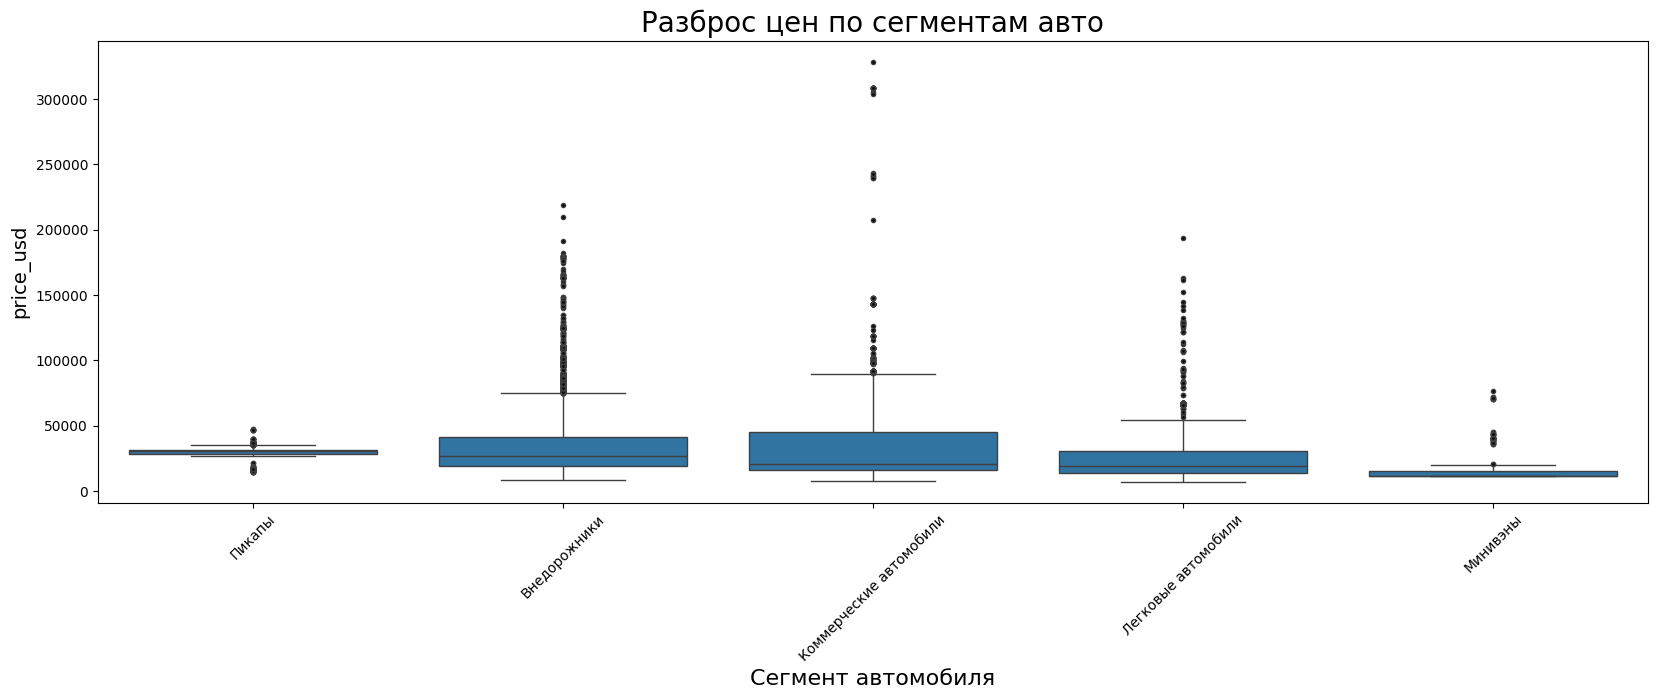

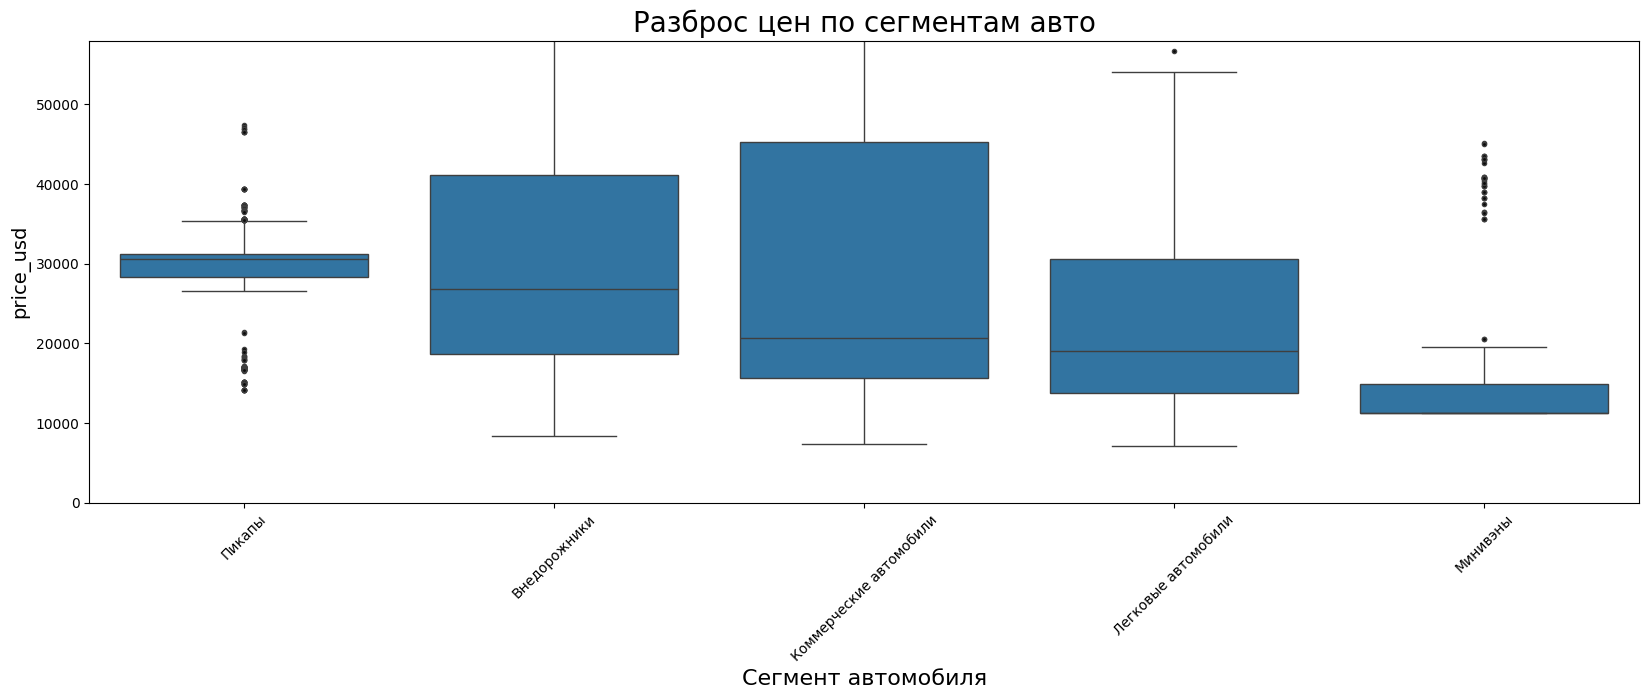

In [ ]:
fig = plt.figure(figsize = (20, 6))
medians = df.groupby('segment_2013')['price_usd'].median().sort_values(ascending=False).index
sns.boxplot(x=df["segment_2013"], y=df["price_usd"], order=medians, flierprops = dict(markerfacecolor = '0.04', markersize = 3))
plt.title(label = 'Разброс цен по сегментам авто', fontsize = 20)
plt.ylabel('price_usd',  fontsize = 14)
plt.xlabel( 'Сегмент автомобиля', size = 16)
plt.xticks(fontsize = 10, rotation = 45)
plt.show()

fig = plt.figure(figsize = (20, 6))
medians = df.groupby('segment_2013')['price_usd'].median().sort_values(ascending=False).index
sns.boxplot(x=df["segment_2013"], y=df["price_usd"], order=medians, flierprops = dict(markerfacecolor = '0.04', markersize = 3))
plt.title(label = 'Разброс цен по сегментам авто', fontsize = 20)
plt.ylabel('price_usd',  fontsize = 14)
plt.xlabel( 'Сегмент автомобиля', size = 16)
plt.xticks(fontsize = 10, rotation = 45)
plt.ylim(0, df["price_usd"].quantile(0.75) + 1.5 * (df["price_usd"].quantile(0.75) - df["price_usd"].quantile(0.25)))
plt.show()



Отфильтруем датафрейм по стоимости меньше  107348.33 USD.

Этот датафрейм будет без 99 процентиля по цене.

In [ ]:
cleaned_df = df.query('price_usd < 107348.33')
cleaned_df.shape

(39560, 19)

### **Вывод:**

- Мы изменили типы данных, привели дату к нужному формату
- Заполнили пропуски, где это было возможно
- Удалили одну строку с отрицательным количеством продаж
- Разделили автомобили по объему двигателя на 4 категории:
'малый', 'средний', 'большой', 'огромный', 'особо малый'.
- Изучили основную статистическую информацию
- Определили, что в данных есть выбросы

## Исследовательский анализ данных

Напишем функцию plot_bar для построения столбчатых гистограмм. Функция принимает датафрейм, данные столбцов x и y, title - название заголовка, названий осей x_label='' и y_label='', также можно настроить цвет. Функция создает гистограмму и выводит ее на экран.def plot_bar(data, col_x, col_y, title='', x_label='', y_label='', pal=''):

In [ ]:
def plot_bar(data, col_x, col_y, title='', x_label='', y_label='', pal=''):
    ax = sns.barplot(x=col_x, y=col_y, data=data, palette=pal)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(fontsize=10, rotation=45)
    plt.show()

### Ёмкость рынка автомобилей

Емкость или объем рынка (в нашем анализе это синонимы) рассчитаем по формуле:

**Е = М * С**,где:

**Е** - емкость рынка в натуральном или денежном выражении (ед./год, USD/год);

**М** - количество реализуемого товара в год (ед.) за вычетом экспортной доли;

**С** - стоимость товара (USD)

Мы располагаем данными продаж автомобилей за три квартала 2019 года. Эксперты отмечают, что в 4 квартале продажи составляют 35-40 % от всего годового объема продаж.
Исходя из этих сведений рассчитаем емкость рынка.

In [ ]:
#  Рассчитаем емкость рынка за 3 квартала в количественном выражении за исключением экспорта
E_3q = df.query('district != "Экспорт область"').quantity.sum()
#  Рассчитаем емкость рынка за год, считая, что за 3 квартала продажи 65% машин
E = E_3q * 100 / 65
display(f'Емкость рынка Казазстана примерно: {E} единиц в год')

'Емкость рынка Казазстана примерно: 79932.30769230769 единиц в год'

In [ ]:
#  Рассчитаем емкость рынка за 3 квартала в денежном выражении за исключением экспорта
E_usd_3q = round(df.query('district != "Экспорт область"').sell_price_usd.sum(),2)
#  Рассчитаем емкость рынка за год, считая, что за 3 квартала продажи 65% машин
E_usd = round((E_usd_3q * 100 / 65),2)
display(f'Емкость рынка Казазстана примерно: {E_usd} USD в год')


'Емкость рынка Казазстана примерно: 2017403852.09 USD в год'

Прогнозируемый объем автомобильного рынка Казахстана на 2019 год составляет  79940.0 автомобилей в год, в денежном выражении - 2 017 349 100 USD  в год.

### Марки лидеры на рынке автомобилей

In [ ]:
# Посмотрим топ-10 брендов на рынке Казахстана
top_brand = df.groupby('brand').agg({'quantity':'sum'}).sort_values(by='quantity', ascending = False).reset_index()
top_brand['percentage'] = top_brand['quantity'] / top_brand['quantity'].sum()
top_brand.columns = ['Бренд', 'Количество', 'Доля продаж']
top_brand.head(10)

,Бренд,Количество,Доля продаж
0,Lada,11092.00,0.21
1,Toyota,10745.00,0.20
2,Hyundai,10168.00,0.19
3,Kia,2358.00,0.04
4,Jac,2099.00,0.04
5,GAZ,1821.00,0.03
6,Renault,1796.00,0.03
7,Ravon,1795.00,0.03
8,Nissan,1664.00,0.03
9,UAZ,1361.00,0.03


Отдельно посмотрим топ-10 брендов на рынке Казахстана среди физических лиц. Будем считать, что они могут купить не больше 2 автомобилей за раз:

In [ ]:
# Посмотрим топ-10 брендов на рынке Казахстана среди физ лиц
top_brand_fl = df.query('quantity <= 2').groupby('brand').agg({'quantity':'sum'}).sort_values(by='quantity', ascending = False).reset_index()
top_brand_fl['percentage'] = top_brand_fl['quantity'] / top_brand_fl['quantity'].sum()
top_brand_fl.columns = ['Бренд', 'Количество', 'Доля продаж']
top_brand_fl.head(10)

,Бренд,Количество,Доля продаж
0,Toyota,10745.00,0.27
1,Hyundai,10168.00,0.26
2,Jac,1988.00,0.05
3,GAZ,1821.00,0.05
4,Renault,1796.00,0.05
5,Ravon,1795.00,0.05
6,Lada,1317.00,0.03
7,Lexus,1206.00,0.03
8,Nissan,1082.00,0.03
9,UAZ,943.00,0.02


Топ-3 бренда по продажам **всех автомобилей** в Казахстане:

- Lada 21% - 11092.00 ед.
- Toyoa 20 % - 10745.00 ед.
- Hyundai 19% - 10168.00 ед.

Топ-3 бренда по продажам **среди физических лиц**:
- Toyota 27 % - 10745.00 ед.
- Hyundai 26 % - 10168.00 ед.
- Jac 5 % - 1988.00 ед.

Удивительно, но среди физ лиц в топ-10 нет Lada. 2 лидера: Toyota и Hyundai. Вместе эти 2 бренда занимают 53 % рынка Казахстана.



In [ ]:
df.columns

Index(['date', 'company', 'brand', 'model', 'year_of_issue',
       'manufacturing_country', 'type_of_fuel', 'engine_volume_l',
       'transmission', 'type_of_drive', 'region', 'quantity', 'price_usd',
       'sell_price_usd', 'district', 'segment_2013', 'class_2013', 'quarter',
       'engine_category'],
      dtype='object')

### Динамика рынка: общая, по сегментам

In [ ]:
# Преобразование столбца 'date' в тип данных даты/времени
df['date'] = df['date'].dt.to_timestamp()

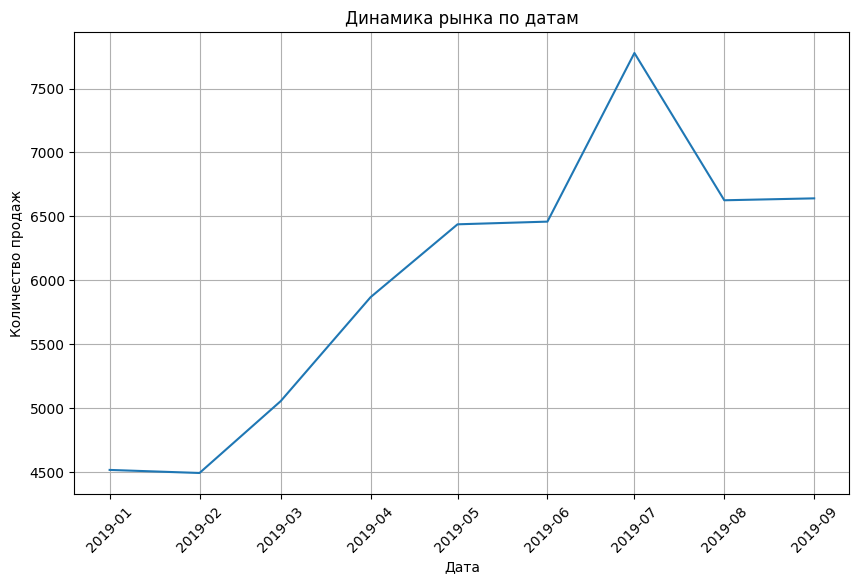

In [ ]:
plt.figure(figsize=(10, 6))

# Построение линейного графика продаж по датам
sns.lineplot(x='date', y='quantity', data=df.groupby('date', sort=False).agg({'quantity':'sum'}))
plt.title('Динамика рынка по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Больше всего автомобилей было куплено в июле, меньше всего в январе и феврале.

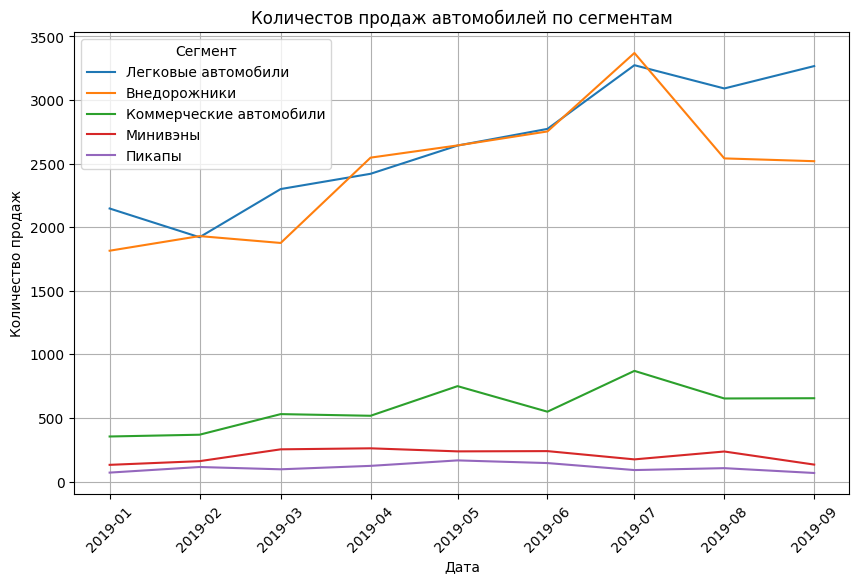

In [ ]:
df_agg = df.groupby(['date', 'segment_2013'], sort=False).agg({'quantity':'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='quantity', hue='segment_2013', data=df_agg)
plt.title('Количестов продаж автомобилей по сегментам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Сегмент')
plt.show()

Чаще покупают легковые автомобили и внедорожники.

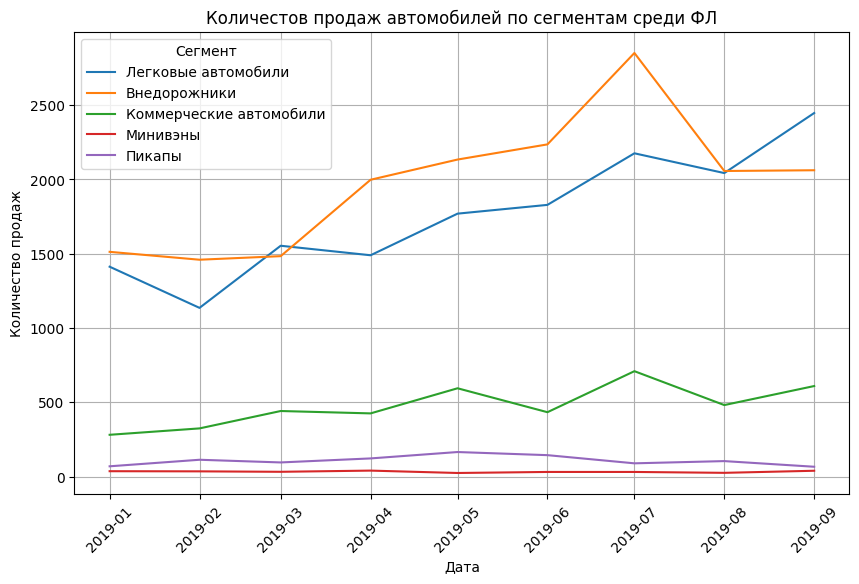

In [ ]:
df_agg = df.query('quantity <= 2').groupby(['date', 'segment_2013'], sort=False).agg({'quantity':'sum'}).reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='quantity', hue='segment_2013', data=df_agg)
plt.title('Количестов продаж автомобилей по сегментам среди ФЛ')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Сегмент')
plt.show()



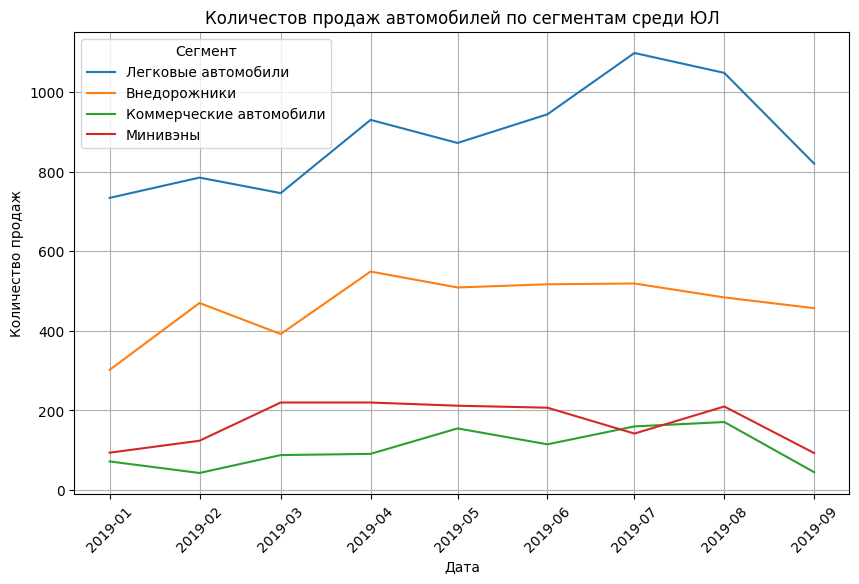

In [ ]:
df_agg = df.query('quantity > 2').groupby(['date', 'segment_2013'], sort=False).agg({'quantity':'sum'}).reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='quantity', hue='segment_2013', data=df_agg)
plt.title('Количестов продаж автомобилей по сегментам среди ЮЛ')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Сегмент')
plt.show()

Среди физических и юридических лиц  больше всего покупают легковые автомобили, меньше внедорожников.

### Продажи автомобилей в разрезе бренд/сегмент

In [ ]:
brand_seg = df.groupby(['segment_2013', 'brand']).agg({'quantity':'sum', 'sell_price_usd':'sum'}).reset_index()
brand_seg.columns = ['Сегмент', 'Бренд', 'Количество продаж', 'Сумма продаж']
brand_seg

,Сегмент,Бренд,Количество продаж,Сумма продаж
0,Внедорожники,Audi,31.00,2459428.72
1,Внедорожники,BMW,379.00,25130796.29
2,Внедорожники,Cadillac,72.00,5853810.54
3,Внедорожники,Chevrolet,638.00,8736311.27
4,Внедорожники,Hyundai,5685.00,145826577.27
...,...,...,...,...
76,Минивэны,Volkswagen,28.00,1321763.32
77,Пикапы,Isuzu,73.00,2049199.13
78,Пикапы,Toyota,827.00,25436704.50
79,Пикапы,UAZ,66.00,1088411.40


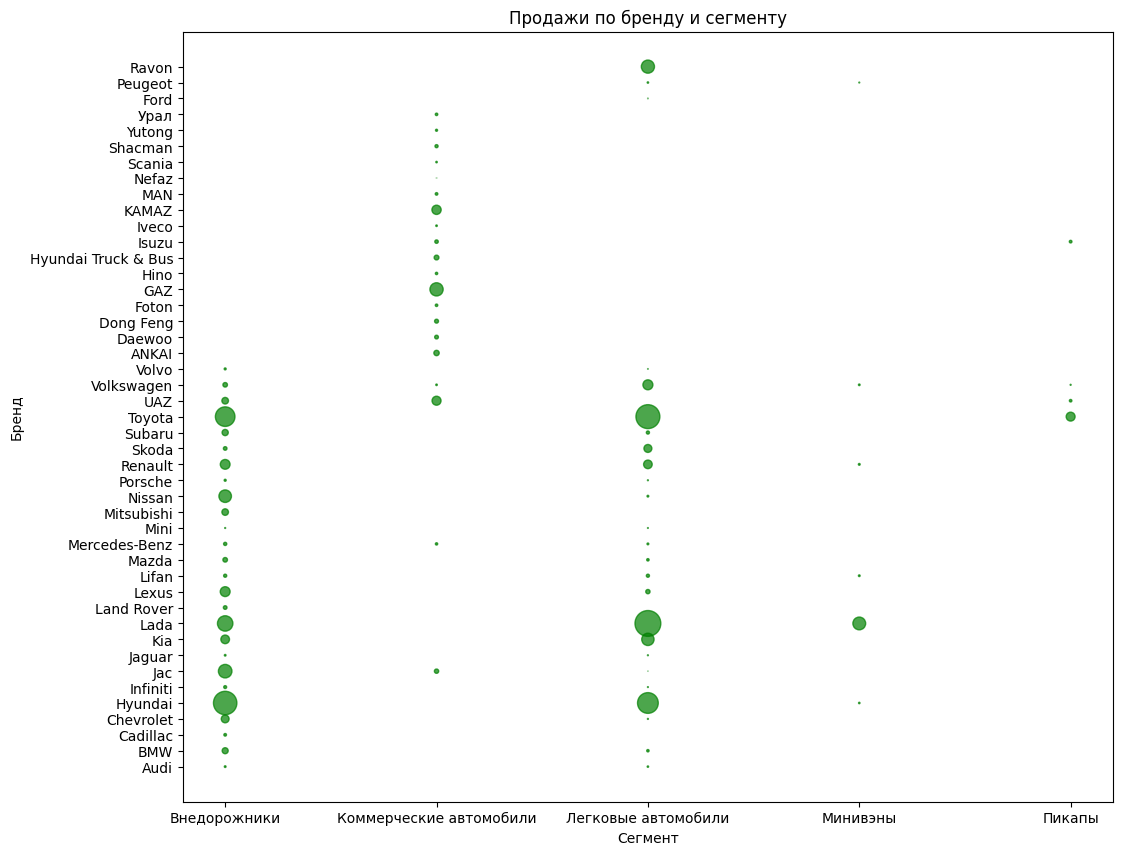

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['green'])
plt.figure(figsize=(12, 10))
plt.scatter(brand_seg['Сегмент'], brand_seg['Бренд'], s=brand_seg['Количество продаж']/20, c=brand_seg['Количество продаж'], cmap=cmap, alpha=0.7)
plt.title('Продажи по бренду и сегменту')
plt.xlabel('Сегмент')
plt.ylabel('Бренд')
plt.show()


В сегменте Легковые автомобили и  Внедорожники клиенты предпочитают бренд Hyunday, Toyota, Lada. В легковых автомобилях Ravon и Kia входят также в топ-5.

По категории Коммерческие автомобили лидируют GAZ, UAZ, KAMAZ.

Среди Минивенов - Lada, среди Пикапов - Toyota.




In [ ]:
brand_class = df.groupby(['class_2013', 'brand']).agg({'quantity':'sum', 'sell_price_usd':'sum'}).reset_index()
brand_class.columns = ['Сегмент', 'Класс', 'Количество продаж', 'Сумма продаж']
brand_class


,Сегмент,Класс,Количество продаж,Сумма продаж
0,A класс,Kia,64.00,703900.00
1,A класс,Mercedes-Benz,5.00,131634.31
2,B класс,Chevrolet,7.00,86600.00
3,B класс,Ford,1.00,14045.64
4,B класс,Hyundai,2211.00,36481914.44
...,...,...,...,...
158,Субкомпактные SUV,Kia,33.00,608600.00
159,Субкомпактные SUV,Lada,2469.00,22338600.00
160,Субкомпактные SUV,Lifan,42.00,514736.32
161,Субкомпактные SUV,Nissan,15.00,309429.56


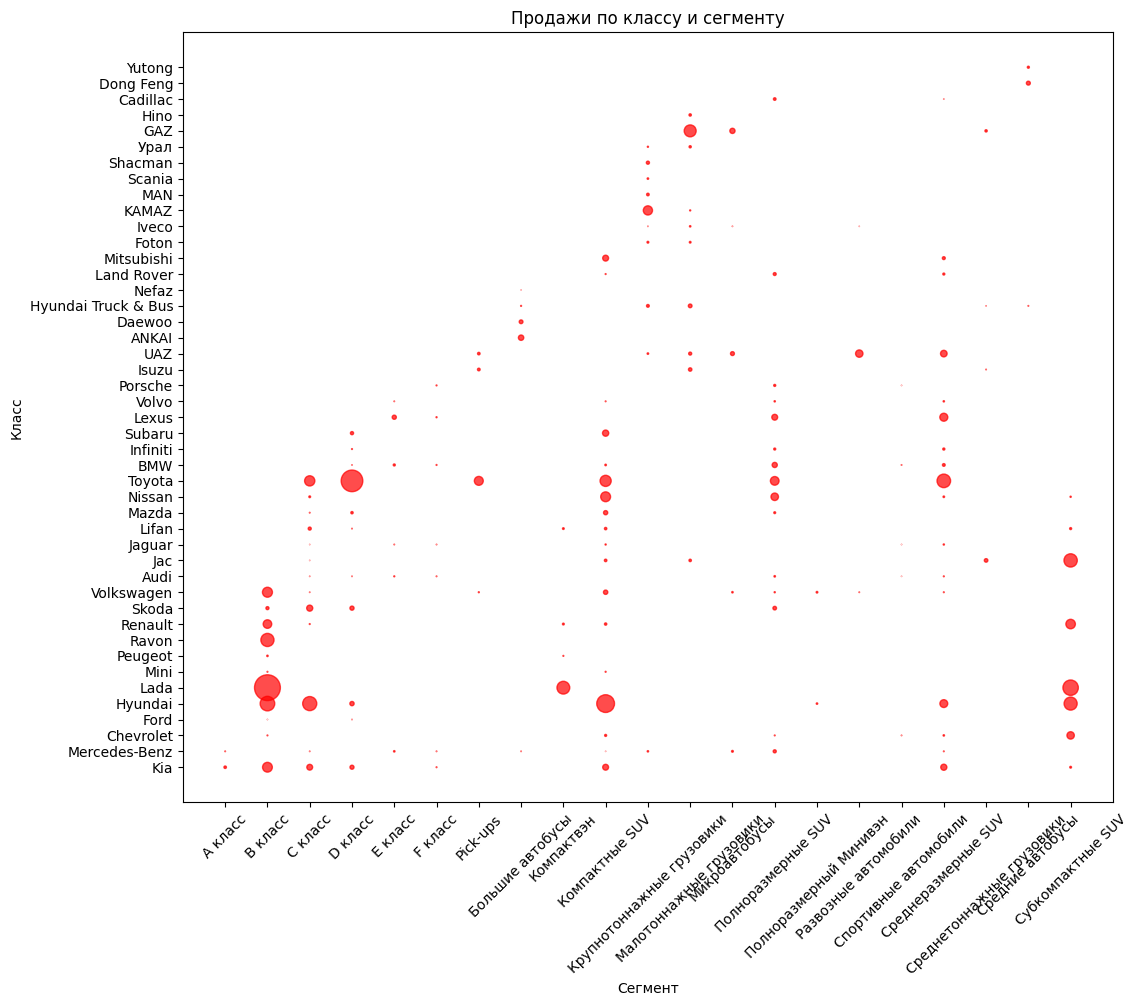

In [ ]:
cmap = ListedColormap(['red'])
plt.figure(figsize=(12, 10))
plt.scatter(brand_class['Сегмент'], brand_class['Класс'], s=brand_class['Количество продаж']/20, c=brand_class['Количество продаж'], cmap=cmap, alpha=0.7)
plt.title('Продажи по классу и сегменту')
plt.xlabel('Сегмент')
plt.ylabel('Класс')
plt.xticks(rotation=45)
plt.show()

По графику видно, что больше всего продаж автмообилей класса В. Лидеры в этой категории: Lada, Hyundai, Ravon, Kia, Volkswagen.

Среди автомобилей коасса С лидер продаж Hyundai и Toyoya.

В классе D выше продажи у Toyoya.

Среди больших автобусов лидер Lada.

Среди малотоннажныз грузовиков - GAZ.

В классе спортивных автомобилей лидер Toyota, cреди среднетоннажных грузовиков - Lada, Hyundai и Jac.



### Медианные цены по брендам

Посмотрим медианные цены на автомобили в разрезе брендов:

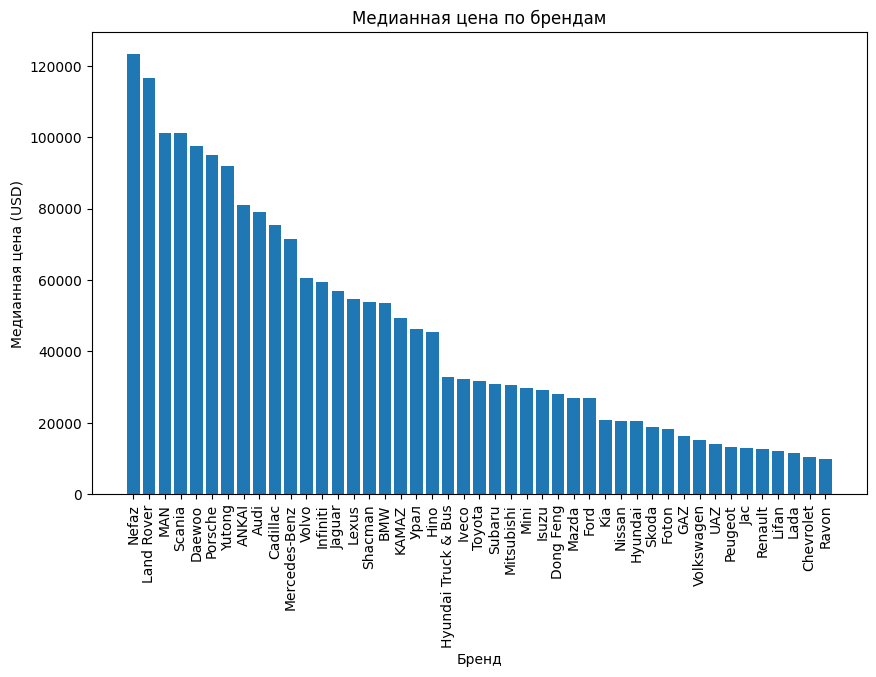

In [ ]:
med_price = df.groupby(['brand']).agg({'price_usd':'median'}).reset_index().sort_values(by='price_usd', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(med_price['brand'], med_price['price_usd'])
plt.title('Медианная цена по брендам')
plt.xlabel('Бренд')
plt.ylabel('Медианная цена (USD)')
plt.xticks(rotation=90)
plt.show()

Самые дорогие бренды: Nefaz, Land Rover, Man, Scania.

Самые бюджетные: Ravon, Chevrolet, Lada, Lifan, Renauit.

### Объем двигателя

Посмотрим продажи автомобилей в разрезе коммерческий и некоммерческий транспорт в зависимости от объема двигателя:

In [ ]:
df.query('quantity <= 2').groupby('engine_category').agg({'quantity':'sum'}).sort_values(by='quantity', ascending = False).reset_index()

,engine_category,quantity
0,средний,21171.00
1,малый,13448.00
2,большой,2570.00
3,огромный,1791.00
4,особо малый,257.00


In [ ]:
df.query('quantity > 2').groupby('engine_category').agg({'quantity':'sum'}).sort_values(by='quantity', ascending = False).reset_index()

,engine_category,quantity
0,малый,11141.00
1,средний,2761.00
2,особо малый,423.00
3,большой,193.00
4,огромный,120.00


Физичские лица чаще приобретают автомобили со средним объемом двигателя 1,8 - 3,499 л.


Юридичские лица с малым  1,1 - 1,799 л.

In [ ]:
df.query('quantity > 2 & engine_category == "малый"').groupby('brand').agg({'quantity':'sum'}).sort_values(by='quantity', ascending = False).reset_index()

,brand,quantity
0,Lada,9097.00
1,Kia,1060.00
2,Volkswagen,514.00
3,Skoda,257.00
4,Nissan,135.00
5,Jac,70.00
6,Chevrolet,8.00


Среди автомобилей с малым объемом двигателя лидируют Lada (9097 ед.), Kia (1060 ед.) и Volkswagen (514 ед.).

### Продажи по регионам

In [ ]:
# Посмотрим продажи по регионам
distr = df.groupby('region').agg({'quantity':'sum'}).sort_values(by='quantity', ascending = False).reset_index()
distr.columns = ['Регион', 'Количество']
distr.head(10)

,Регион,Количество
0,Алматы,13947.00
1,Нур-Султан,10158.00
2,Шымкент,3749.00
3,Атырау,3393.00
4,Костанай,3258.00
5,Караганда,2983.00
6,Уральск,2180.00
7,Усть-Каменогорск,2097.00
8,Актау,2049.00
9,ЭКСПОРТ,1919.00


Больше всего продаж в самых крупных городах Казахстана: Алматы (13947 продаж) и Нуп-Султане (10158 продаж).

### Продажи автоцентров

In [ ]:
comp = df.groupby('company').agg({'quantity':'sum', 'sell_price_usd':'sum'}).sort_values(by='quantity', ascending=False).reset_index()
comp.columns = ['Автоцентр', 'Количество продаж', 'Сумма продаж']
comp.head(10)


,Автоцентр,Количество продаж,Сумма продаж
0,Бипэк Авто,15132.00,186017769.70
1,Toyota Motor Kazakhstan,11951.00,479876439.43
2,Astana Motors,10169.00,229338604.06
3,Вираж,2909.00,46124756.28
4,Allur Auto,2636.00,66512281.58
5,Renault Россия,1796.00,24184906.23
6,Nissan Manufacturing Rus,1760.00,46289495.68
7,Ravon Motors Kazakstan,1507.00,14938093.62
8,Тк Камаз,893.00,46215934.55
9,Volkswagen Group Rus,664.00,13663264.42


In [ ]:
df_company_top = df.pivot_table(index='company', values='quantity', aggfunc='sum')\
                            .sort_values(by='quantity', ascending=False).head(15)
df_company_top = df_company_top.index

In [ ]:
#  датафрейм с топ-10 компаний по выручке
top_10_comp = df.query('company in @df_company_top')

In [ ]:
df_cumsum = top_10_comp.groupby(['date', 'company'], sort=False).agg({'quantity':'sum'}).reset_index()
df_cumsum['cum_sum_quan'] = df_cumsum.groupby('company')['quantity'].cumsum()
df_cumsum

,date,company,quantity,cum_sum_quan
0,2019-05-01,Mercur Auto,153.00,153.00
1,2019-08-01,Mercur Auto,14.00,167.00
2,2019-04-01,Mercur Auto,78.00,245.00
3,2019-07-01,Mercur Auto,17.00,262.00
4,2019-02-01,Mercur Auto,126.00,388.00
...,...,...,...,...
122,2019-05-01,Volkswagen Group Rus,53.00,664.00
123,2019-05-01,Семаз,55.00,336.00
124,2019-01-01,Семаз,36.00,372.00
125,2019-02-01,Семаз,1.00,373.00


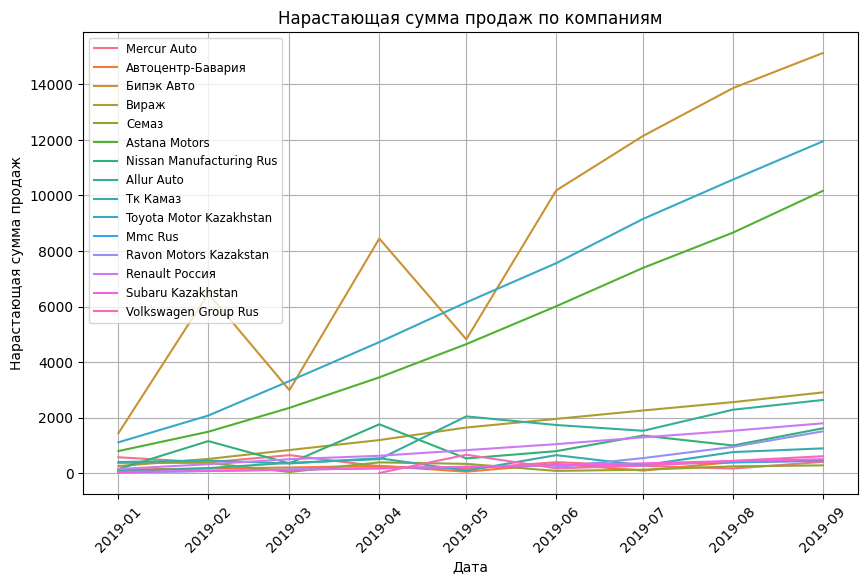

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='cum_sum_quan', hue='company', data=df_cumsum)
plt.title('Нарастающая сумма продаж по компаниям')
plt.xlabel('Дата')
plt.ylabel('Нарастающая сумма продаж')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(fontsize='small')
plt.show()

В лидерах по объему продаж: Бипэк Авто, Toyota Motor Kazakhstan и Astana Motors. Причем у Бипэк Авто нарастающий итог неровный, а зигзагообразный в течение первых 2 кварталов. Скорее всего были крупные заказы и ждали производство автомобилей.

Посмотрим мульти- и монобрендовые компании:

In [ ]:
uniq_brand = df.groupby('company').agg({'brand':'nunique'}).sort_values(by='brand', ascending=False).reset_index()
uniq_brand.columns = ['Автоцентр', 'Количество брендов']
uniq_brand

,Автоцентр,Количество брендов
0,Allur Auto,7
1,Бипэк Авто,5
2,Семаз,4
3,Вираж,3
4,Mercur Auto,3
5,Astana Motors,2
6,Тк Камаз,2
7,Свс-Транс,2
8,Eurasia Motor Premium,2
9,Terra Motors,2


Максимальное количество брендов у Allur Auto - 7, у Бипэк Авто - 5. У Меркур Авто - 3. Много дилеров продают один бренд.

### Модели - лидеры на рынке

In [ ]:
top_model = df.groupby(['brand','model']).agg({'quantity':'sum', 'sell_price_usd':'sum'}).sort_values(by='quantity', ascending=False).reset_index()
top_model['percentage'] = top_model['quantity'] / top_model['quantity'].sum()
top_model.columns = ['Бренд', 'Модель', 'Количество продаж', 'Сумма продаж', 'Доля продаж']
top_model.head(10)

,Бренд,Модель,Количество продаж,Сумма продаж,Доля продаж
0,Toyota,Camry,4853.00,155748735.08,0.09
1,Lada,Granta,3664.00,26671905.26,0.07
2,Hyundai,Tucson,3271.00,87315649.16,0.06
3,Lada,Vesta,2653.00,31116273.68,0.05
4,Lada,4x4,2469.00,22338600.00,0.05
5,Hyundai,Accent,2211.00,36481914.44,0.04
6,Hyundai,Elantra,2062.00,41269145.64,0.04
7,Hyundai,Creta,1775.00,35222266.67,0.03
8,Toyota,LC Prado,1711.00,83134112.05,0.03
9,Ravon,Nexia R3,1700.00,16714967.50,0.03


Посмотрим ту же информацию по ФЛ (физическим лицам)

In [ ]:
top_model_fl = df.query('quantity <= 2').groupby(['brand','model']).agg({'quantity':'sum', 'sell_price_usd':'sum'}).sort_values(by='quantity', ascending=False).reset_index()
top_model_fl['percentage'] = top_model_fl['quantity'] / top_model_fl['quantity'].sum()
top_model_fl.columns = ['Бренд', 'Модель', 'Количество продаж', 'Сумма продаж', 'Доля продаж']
top_model_fl = top_model_fl
top_model_fl


,Бренд,Модель,Количество продаж,Сумма продаж,Доля продаж
0,Toyota,Camry,4853.00,155748735.08,0.12
1,Hyundai,Tucson,3271.00,87315649.16,0.08
2,Hyundai,Accent,2211.00,36481914.44,0.06
3,Hyundai,Elantra,2062.00,41269145.64,0.05
4,Hyundai,Creta,1775.00,35222266.67,0.05
...,...,...,...,...,...
264,BMW,i8,1.00,161273.61,0.00
265,BMW,Z4,1.00,42213.39,0.00
266,BMW,8 серия,1.00,132583.55,0.00
267,BMW,6 серия,1.00,53491.29,0.00


Самая популярная модель автомобиля в Казахстане в 2019 году была Toyota	Camry. Всего продали за 3 квартала 4853 ед. Причем все проданы физическим лицам.

Далеее по общим продажам идут Lada	Granta 3664 ед. и Hyundai	Tucson 3271 ед.

Среди ФЛ второе и третье место у Hyundai	Tucson	3271 ед.	 и Hyundai	Accent	2211 ед.

### **Вывод**

Проведен анализ продаж автомобилей в Казахстане за январь - сентябрь 2019 года.


- Прогнозируемый объем автомобильного рынка Казахстана на 2019 год составляет около 79 940 автомобилей в год,  в денежном выражении составляет примерно 2 017 349 100 долларов в год.

 - Топ-3 бренда по продажам всех автомобилей в Казахстане:
•	Lada 21% - 11092.00 ед.
•	Toyoa 20 % - 10745.00 ед.
•	Hyundai 19% - 10168.00 ед.

- Топ-3 бренда по продажам среди физических лиц:
•	Toyota 27 % - 10745.00 ед.
•	Hyundai 26 % - 10168.00 ед.
•	Jac 5 % - 1988.00 ед.

- Больше всего автомобилей было куплено в июле, меньше всего в январе и феврале.

- Чаще покупают легковые автомобили, меньше внедорожников.

- В сегменте Легковые автомобили и Внедорожники клиенты предпочитают бренд Hyunday, Toyota, Lada. В легковых автомобилях Ravon и Kia входят также в топ-5.
В категории Коммерческие автомобили лидируют GAZ, UAZ, KAMAZ.
Среди Минивенов - Lada, среди Пикапов - Toyota.

- Самые дорогие бренды: Nefaz, Land Rover, Man, Scania.
Самые бюджетные: Ravon, Chevrolet, Lada, Lifan, Renauit.


- Физичские лица чаще приобретают автомобили со средним объемом двигателя 1,8 - 3,499 л.
Юридичские лица с малым 1,1 - 1,799 л.

- Среди автомобилей с малым объемом двигателя лидируют Lada (9097 ед.), Kia (1060 ед.) и Volkswagen (514 ед.).

- Больше всего продаж в самых крупных городах Казахстана: Алматы (13947 продаж) и Нуп-Султане (10158 продаж).

- В лидерах по объему продаж: Бипэк Авто, Toyota Motor Kazakhstan и Astana Motors.


- Максимальное количество брендов у Allur Auto - 7, у Бипэк Авто - 5. У Меркур Авто - 3. Много дилеров продают один бренд.

- Самая популярная модель автомобиля в Казахстане в 2019 году была Toyota Camry. Всего продали за 3 квартала 4853 ед.

- Далее по общим продажам идут Lada  Granta 3664 ед. и Hyundai Tucson 3271 ед.
Среди ФЛ второе и третье место у Hyundai  Tucson  3271 ед.   и Hyundai  Accent  2211 ед.


## Анализ положения Меркур Авто:

В mercur_df сохраним отфильтрованный датафрейм по Меркур Авто:

In [ ]:
mercur_df = df.query('company == "Mercur Auto"')


Посмотрим, в каких регионах представлен Меркур Авто:

In [ ]:
mercur_df.groupby(['region']).agg({'quantity':'sum'}).sort_values(by='quantity', ascending=False).reset_index()

,region,quantity
0,Алматы,484.00
1,Нур-Султан,59.00
2,Атырау,43.00
3,Костанай,26.00
4,Караганда,23.00
5,Уральск,15.00


Дилерские автоцентры компании находятся в  Алматы, Нур-Султане, Атырау, Караганде, Костанае и Уральске.

Подавляющая доля продаж в Алматы - 484 ед.

Посмотрим, какие уникальные бренды представлены в Меркур Авто:

In [ ]:
mercur_df.groupby('company').agg({'brand':'nunique', 'model' : 'nunique'}).sort_values(by='brand', ascending=False).reset_index()

,company,brand,model
0,Mercur Auto,3,23


In [ ]:
mercur_df.brand.unique()

array(['Audi', 'Porsche', 'Volkswagen'], dtype=object)

Меркур Авто занимаются реализацией и сервисным обслуживанием автомобилей марок Volkswagen, Audi, Porsche. Всего в линейке автомобилей 23 модели.

In [ ]:
mercur_df.groupby('class_2013')['quantity'].sum().sort_values(ascending = False)

class_2013
B класс                  440.00
Компактные SUV            81.00
Полноразмерные SUV        70.00
F класс                   13.00
Среднеразмерные SUV       11.00
E класс                   10.00
Микроавтобусы              8.00
C класс                    5.00
Полноразмерный Минивэн     5.00
D класс                    3.00
Pick-ups                   2.00
Спортивные автомобили      2.00
Name: quantity, dtype: float64

В основном Меркур Авто продает автомобили класса В.

Посмотрим продажи за период январь - сентябрь 2019 года в количественном  и денежном выражении:

In [ ]:
mercur_brand = mercur_df.groupby('brand').agg({'quantity':'sum', 'sell_price_usd':'sum'})\
                                .sort_values(by='quantity', ascending = False).reset_index()
mercur_brand['percentage'] = mercur_brand['quantity']/mercur_brand['quantity'].sum()
mercur_brand

,brand,quantity,sell_price_usd,percentage
0,Volkswagen,546.00,10182272.86,0.84
1,Audi,52.00,4059490.43,0.08
2,Porsche,52.00,5113512.70,0.08


Больше всего продано Volkswagen (84 %)	- 546 автомобилей на сумму более 10 млн.долларов, Audi и Porsche по 8 % - это  по 52 автомобиля на сумму 4059490.43 и 5113512.70 долларов соответственно.

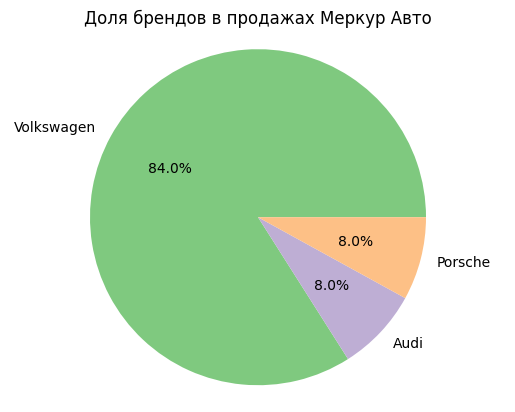

In [ ]:
sizes = mercur_brand['percentage']
labels = mercur_brand['brand']
colors = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('Доля брендов в продажах Меркур Авто')
plt.show()


Посмотрим продажи автомобилей по месяцам с разбивкой по бренду:

In [ ]:
mercur_df.groupby(['date', 'brand']).agg({'quantity':'sum', 'sell_price_usd':'sum'}).sort_values(by='date', ascending = True).reset_index()

,date,brand,quantity,sell_price_usd
0,2019-01-01,Audi,2.00,177770.80
1,2019-01-01,Porsche,1.00,89000.00
2,2019-01-01,Volkswagen,162.00,2712635.85
3,2019-02-01,Audi,2.00,91904.59
4,2019-02-01,Porsche,5.00,554264.15
5,2019-02-01,Volkswagen,119.00,2303214.92
6,2019-03-01,Audi,9.00,717757.00
7,2019-03-01,Porsche,7.00,652162.67
8,2019-03-01,Volkswagen,62.00,1337707.33
9,2019-04-01,Porsche,8.00,767029.88


<ipython-input-689-3c6e93778f6e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='sell_price_usd', data=mercur_df.groupby(['date', 'brand']).agg({'sell_price_usd':'sum'}), ci=None)


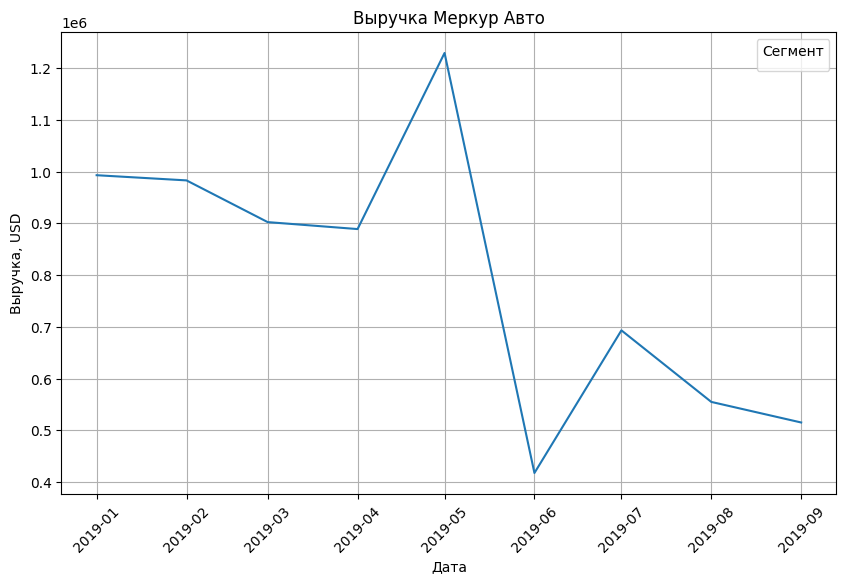

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='sell_price_usd', data=mercur_df.groupby(['date', 'brand']).agg({'sell_price_usd':'sum'}), ci=None)
plt.title('Выручка Меркур Авто')
plt.xlabel('Дата')
plt.ylabel('Выручка, USD')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Сегмент')
plt.show()

<ipython-input-690-fa87ae161439>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='quantity', data=mercur_df.groupby(['date', 'brand']).agg({'quantity':'sum'}), ci=None)


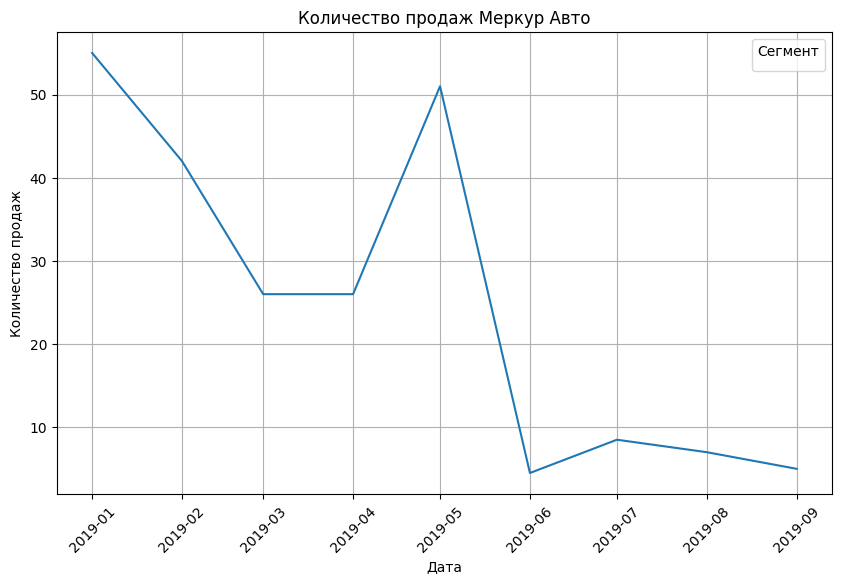

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='quantity', data=mercur_df.groupby(['date', 'brand']).agg({'quantity':'sum'}), ci=None)
plt.title('Количество продаж Меркур Авто')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Сегмент')
plt.show()

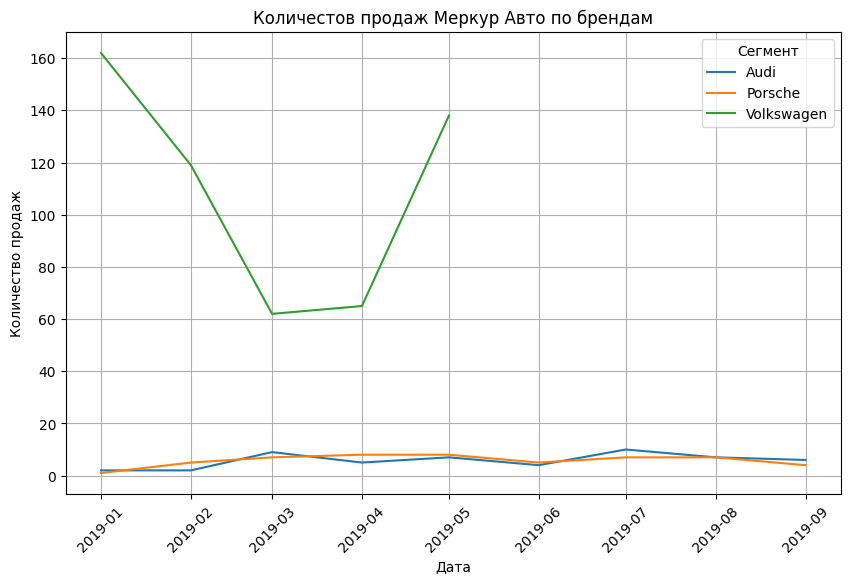

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='quantity', hue='brand', data=mercur_df.groupby(['date', 'brand']).agg({'quantity':'sum'}))
plt.title('Количестов продаж Меркур Авто по брендам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Сегмент')
plt.show()

По линейному графику видно, что основная доля продаж Меркур Авто - это brand Volcswagen. В январе 2019 продажи стали резко снижаться со 162 единиц  до 62 единиц в марте. В мае продажи снова стали расти, достигнув 138 штук. Продаж Volcswagen после мая 2019 года в Меркур Авто не было.

Audi и Porsche вместе продаются в районе 10 штук в месяц.

Посмотрим какие компании еще продавали в 2019 году Volkswagen:

In [ ]:
df.query('brand == "Volkswagen"').groupby(['date', 'company']).agg({'quantity':'sum', 'sell_price_usd':'sum'}).sort_values(by='date', ascending = True).reset_index()

,date,company,quantity,sell_price_usd
0,2019-01-01,Eurasia Motor Zhaik,8.00,170186.47
1,2019-01-01,Mercur Auto,162.00,2712635.85
2,2019-01-01,Автодом Motors Kst,18.00,340960.46
3,2019-01-01,Автомир,6.00,108951.50
4,2019-02-01,Mercur Auto,119.00,2303214.92
5,2019-02-01,Автодом Motors Kst,16.00,319911.16
6,2019-03-01,Mercur Auto,62.00,1337707.33
7,2019-04-01,Автомир,14.00,311923.83
8,2019-04-01,Автодом Motors Kst,19.00,403860.39
9,2019-04-01,Volkswagen Group Rus,7.00,286894.64


In [ ]:
df.query('company == "Volkswagen Group Rus"').groupby(['date','company', 'brand']).agg({'quantity':'sum', 'sell_price_usd':'sum'}).sort_values(by='date', ascending = True).reset_index()

,date,company,brand,quantity,sell_price_usd
0,2019-04-01,Volkswagen Group Rus,Volkswagen,7.00,286894.64
1,2019-05-01,Volkswagen Group Rus,Volkswagen,53.00,1330246.18
2,2019-06-01,Volkswagen Group Rus,Volkswagen,167.00,3335672.06
3,2019-07-01,Volkswagen Group Rus,Volkswagen,94.00,2093551.64
4,2019-08-01,Volkswagen Group Rus,Volkswagen,176.00,3481725.53
5,2019-09-01,Volkswagen Group Rus,Volkswagen,167.00,3135174.38


С июня 2019 года бренд Volkswagen в Казахстане продает только компания Volkswagen Group Rus. Ранее поставки автомобилей марок Volkswagen на территорию Казахстана осуществлялись через компанию Mercur Auto, Автодом Motors Kst, Автомир и Eurasia Motor Zhaik. Однако Volkswagen Group Rus - крупный игрок, став официальным дилером выдавил с рынка конкурентов.

Посмотрим какие конкурентов Меркур Авто, кто предлагает бренды Volkswagen, Porsche и Audi.

In [ ]:
df.query('brand == "Volkswagen" | brand == "Porsche" | brand == "Audi"').groupby(['company', 'brand']).agg({'quantity':'sum', 'sell_price_usd':'sum'})\
                                .sort_values(by='quantity', ascending = False).reset_index()

,company,brand,quantity,sell_price_usd
0,Volkswagen Group Rus,Volkswagen,664.00,13663264.42
1,Mercur Auto,Volkswagen,546.00,10182272.86
2,Автодом Motors Kst,Volkswagen,53.00,1064732.01
3,Mercur Auto,Audi,52.00,4059490.43
4,Mercur Auto,Porsche,52.00,5113512.70
5,Автомир,Volkswagen,34.00,660552.90
6,Eurasia Motor Zhaik,Volkswagen,15.00,320037.58


У Volkswagen в 2019 году было 5 дилерских центров, с 3 квартала только Volkswagen Group Rus продавал этот бренд.

Основной конкурент Меркур Авто - Volkswagen Group Rus.

Для Porsche и Audi (дорогие бренды) Меркур Авто являлся единственным представителем в Казахстане. Однако объем продаж низкий, около 10 машин в месяц.

Прибыль посчитать мы не можем, данных недостаточно. Но даже по объему видно, что цифры низкие.

BCG - анализ продаж по моделям

In [ ]:
df.columns

Index(['date', 'company', 'brand', 'model', 'year_of_issue',
       'manufacturing_country', 'type_of_fuel', 'engine_volume_l',
       'transmission', 'type_of_drive', 'region', 'quantity', 'price_usd',
       'sell_price_usd', 'district', 'segment_2013', 'class_2013', 'quarter',
       'engine_category'],
      dtype='object')

In [ ]:
# список моделей авто Меркур Авто
list_model = mercur_df.model.unique()
list_model

array(['A3', 'A4', 'A6', 'A7', 'A8', 'Q5', 'Q7', '911 Carrera S',
       'Cayenne', 'Macan', 'Panamera', 'Amarok', 'Jetta', 'Multivan',
       'Polo', 'Tiguan', 'Touareg', 'Transporter', 'Transporter Kasten',
       'Q8', 'RS5', 'Teramont', 'Transporter Kombi '], dtype=object)

In [ ]:
bcg1 = mercur_df.query('brand == "Volkswagen" & quarter == "I квартал"').groupby(['model', 'quarter']).agg({'quantity':'sum'})\
                                .sort_values(by='quantity', ascending = False).reset_index()
bcg1.columns = ['Модель', 'Квартал', 'I квартал']
bcg1

,Модель,Квартал,I квартал
0,Polo,I квартал,273.00
1,Tiguan,I квартал,51.00
2,Transporter Kasten,I квартал,7.00
3,Jetta,I квартал,3.00
4,Multivan,I квартал,3.00
5,Amarok,I квартал,2.00
6,Transporter,I квартал,2.00
7,Teramont,I квартал,1.00
8,Transporter Kombi,I квартал,1.00


In [ ]:
bcg2 = mercur_df.query('brand == "Volkswagen" & quarter == "II квартал"').groupby(['model', 'quarter']).agg({'quantity':'sum'})\
                                .sort_values(by='quantity', ascending = False).reset_index()
bcg2.columns = ['Модель', 'Квартал', 'II квартал']
bcg2

,Модель,Квартал,II квартал
0,Polo,II квартал,167.00
1,Tiguan,II квартал,30.00
2,Teramont,II квартал,3.00
3,Touareg,II квартал,3.00


In [ ]:
merged_bcg = pd.merge(bcg1, bcg2, on='Модель', how='inner')

merged_bcg = merged_bcg.head(5)
merged_bcg = merged_bcg.drop(['Квартал_x', 'Квартал_y'], axis=1)
merged_bcg

,Модель,I квартал,II квартал
0,Polo,273.00,167.00
1,Tiguan,51.00,30.00
2,Teramont,1.00,3.00


In [ ]:
bc_v2 = df.query('company == "Volkswagen Group Rus" & quarter == "II квартал"').groupby(['model', 'quarter']).agg({'quantity':'sum'})\
                                .sort_values(by='quantity', ascending = False).reset_index()
bc_v2.columns = ['Модель', 'Квартал', 'II квартал']
bc_v2

,Модель,Квартал,II квартал
0,Polo,II квартал,170.00
1,Tiguan,II квартал,35.00
2,Caravelle,II квартал,5.00
3,Teramont,II квартал,4.00
4,Touareg,II квартал,3.00
5,Amarok,II квартал,2.00
6,Caddy Maxi Kombi,II квартал,2.00
7,Multivan,II квартал,2.00
8,Transporter Kasten,II квартал,2.00
9,Caddy Kasten,II квартал,1.00


In [ ]:
bcg = pd.merge(merged_bcg, bc_v2, on='Модель', how='inner')
bcg = bcg.head(5)
bcg = bcg.drop(['Квартал'], axis=1)
bcg.columns = ['Модель', '1 кв. Меркур', '2 кв. Меркур', '2 кв. Volkswagen RUS']
bcg['Темп роста'] = (bcg['2 кв. Меркур'] - bcg['1 кв. Меркур']) / bcg['1 кв. Меркур'] * 100
bcg['Объем рынка 2 кв.'] = bcg['2 кв. Меркур'] + bcg['2 кв. Volkswagen RUS']
bcg['Относительная доля рынка'] = bcg['2 кв. Меркур'] / bcg['Объем рынка 2 кв.'] * 100

bcg


,Модель,1 кв. Меркур,2 кв. Меркур,2 кв. Volkswagen RUS,Темп роста,Объем рынка 2 кв.,Относительная доля рынка
0,Polo,273.00,167.00,170.00,-38.83,337.00,49.55
1,Tiguan,51.00,30.00,35.00,-41.18,65.00,46.15
2,Teramont,1.00,3.00,4.00,200.00,7.00,42.86


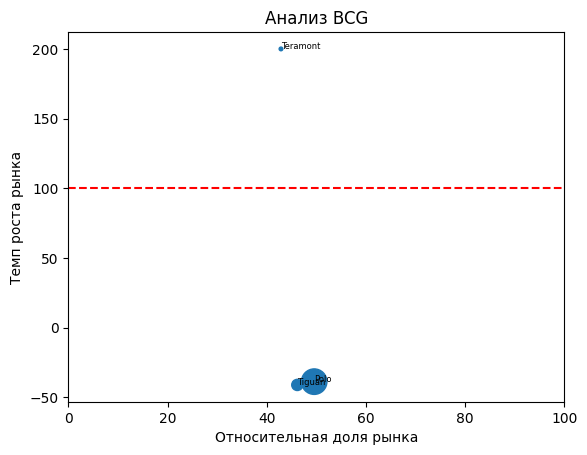

In [ ]:
plt.scatter(bcg['Относительная доля рынка'], bcg['Темп роста'], s=bcg['Объем рынка 2 кв.'])
# Добавление подписей точек
for i, row in bcg.iterrows():
    plt.annotate(row['Модель'], (row['Относительная доля рынка'], row['Темп роста']) ,fontsize=6)
# Проведение линии по оси Y в значении 100
plt.axhline(y=100, color='r', linestyle='--')
plt.xlabel('Относительная доля рынка')
plt.ylabel('Темп роста рынка')
plt.title('Анализ BCG')
plt.xlim(0, 100)
plt.show()




По проведенному BCG-анализу (исследовали модели, которые продавали в 1 и 2 квартале Меркур Авто и Volkswagen Group Rus) модели Tiguan и Polo скорее находились в зоне Дойные коровы. Эти модели имели во 2 квартале имели долю рынка около 50 %, то это может считаться высокой долей рынка.

Модель Teramont вообще опережада темп роста рынка, однако продаж меньше 5, не достаточно для анализа.

В 3 квартале Volkswagen Group Rus уже был единственным, кто продавал автомобили бренда, даже Дойные коровы не помогли Меркур авто.



## Вывод

- Дилерские автоцентры компании находятся в Алматы, Нур-Султане, Атырау, Караганде, Костанае и Уральске.

- Подавляющая доля продаж в Алматы - 484 ед.

- Меркур Авто занимаются реализацией и сервисным обслуживанием автомобилей марок Volkswagen, Audi, Porsche. Всего в линейке автомобилей 23 модели.

- Меркур Авто продает автомобили класса В.  84% продаж - Volkswagen, Audi и Porsche по 8 %.

- В январе 2019 продажи стали резко снижаться со 162 единиц до 62 единиц в марте. В мае продажи снова стали расти, достигнув 138 штук. В 3 квартале 2019 года продаж Volcswagen  не было.

- Audi и Porsche вместе продаются в среднем 10 штук в месяц.

- Основные конкуренты Меркур Авто: Автодом Motors Kst, Автомир, Eurasia Motor Zhaik и Volkswagen Group Rus.

- С июня 2019 года бренд Volkswagen в Казахстане продает только компания Volkswagen Group Rus.  Став официальным дилером выдавил с рынка конкурентов.

- Для Porsche и Audi  Меркур Авто является единственным представителем в Казахстане. Однако объем продаж низкий.



По проведенному BCG-анализу за 2 квартал модели Tiguan и Polo скорее находились в зоне Дойные коровы для Меркур Авто. Эти модели имели во 2 квартале имели долю рынка около 50 %.


Модели Tiguan и Polo приносили Меркур Авто максимум выручки, однако удержать лидерство на рынке не получилось. Мероприятия могли включать в себя: инвестиции в маркетинг, улучшение качества продукта или предоставление дополнительных услуг для удовлетворения потребностей клиентов.

Дойные коровы имеют ограниченные перспективы для роста на текущем рынке, необходимо  исследовать новые возможности для расширения своего бизнеса. Например, поиск новых рынков (городов).

В 3 квартале Дойные коровы ушли в область Дохлых собак.



